# Part 2 - House prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## A quick look at the data

The following lines provide us an initial global summary of the dataframe.

### Dataframe import and first look

In [2]:
# Load the data
df = pd.read_csv("c3_house-prices.csv")

In [3]:
# Check the number of rows and columns
print("The shape of the dataframe is ",df.shape[0], "rows and " ,df.shape[1], "columns")

The shape of the dataframe is  2430 rows and  82 columns


In [4]:
# display first five entries 
pd.options.display.max_columns = 100 # show all the columns
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    484  528275070           60        RL           NaN      8795   Pave   
1   2586  535305120           20        RL          75.0     10170   Pave   
2   2289  923228250          160        RM          21.0      2001   Pave   
3    142  535152150           20        RL          70.0     10552   Pave   
4   2042  903475060          190        RM          60.0     10120   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
2   NaN       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
3   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
4   NaN       IR1          Bnk    AllPub     Inside        Gtl      OldTown   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      2Story             7             5   
1        Norm        Norm      1Fam      1Story             6             6   
2        Norm        Norm     Twnhs      2Story             4             5   
3        Norm        Norm      1Fam      1Story             5             5   
4       Feedr        Norm    2fmCon      2.5Unf             7             4   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        2000            2000      Gable   CompShg      VinylSd      VinylSd   
1        1951            1951        Hip   CompShg      Wd Sdng      Wd Sdng   
2        1970            1970      Gable   CompShg      CemntBd      CmentBd   
3        1959            1959        Hip   CompShg      BrkFace      BrkFace   
4        1910            1950        Hip   CompShg      Wd Sdng      Wd Sdng   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         Gd         TA      PConc        Gd   
1      BrkFace         522.0         TA         TA     CBlock        TA   
2      BrkFace          80.0         TA         TA     CBlock        TA   
3         None           0.0         TA         TA     CBlock        TA   
4         None           0.0         Fa         TA     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         300.0            Unf   
1        TA            No            Unf           0.0            Unf   
2        TA            No            Unf           0.0            Unf   
3        TA            No            Rec        1018.0            Unf   
4        TA            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        652.0          952.0    GasA         Ex           Y   
1           0.0        216.0          216.0    GasA         TA           Y   
2           0.0        546.0          546.0    GasA         Fa           Y   
3           0.0        380.0         1398.0    GasA         Gd           Y   
4           0.0        925.0          925.0    GasA         TA           N   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         980        1276                0         2256   
1      SBrkr        1575           0                0         1575   
2      SBrkr         546         546                0         1092   
3      SBrkr        1700           0                0         1700   
4      FuseF         964         925                0         1889   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              4   
1             0.0             0.0          1          1              2   
2             0.0             0.0          1          1              3   
3             0.0             1.0

In [5]:
# show data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2430 non-null   int64  
 1   PID              2430 non-null   int64  
 2   MS SubClass      2430 non-null   int64  
 3   MS Zoning        2430 non-null   object 
 4   Lot Frontage     2010 non-null   float64
 5   Lot Area         2430 non-null   int64  
 6   Street           2430 non-null   object 
 7   Alley            163 non-null    object 
 8   Lot Shape        2430 non-null   object 
 9   Land Contour     2430 non-null   object 
 10  Utilities        2430 non-null   object 
 11  Lot Config       2430 non-null   object 
 12  Land Slope       2430 non-null   object 
 13  Neighborhood     2430 non-null   object 
 14  Condition 1      2430 non-null   object 
 15  Condition 2      2430 non-null   object 
 16  Bldg Type        2430 non-null   object 
 17  House Style   

In [6]:
# to all column names, replace whitespace with underscores and convert to lowercase
df.columns = [col.replace(' ', '_').lower() for col in df.columns]

In [7]:
# In previous line of code, we can see 3 types of data : float64(11), int64(28), object(43)
# lists to hold column names of each data type
int_cols = []
str_cols = []
float_cols = []

# loop through columns type and categorize them 
for col in df.columns:
    if df[col].dtype == 'int64':
        int_cols.append(col)
    elif df[col].dtype == 'float64':
        float_cols.append(col)
    elif df[col].dtype == 'object':
        str_cols.append(col)

# print out lists
print(f'Integer Columns: {int_cols}')
print(f'\nFloat Columns: {float_cols}')
print(f'\nString Columns: {str_cols}')

Integer Columns: ['order', 'pid', 'ms_subclass', 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice']

Float Columns: ['lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath', 'garage_yr_blt', 'garage_cars', 'garage_area']

String Columns: ['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type

### Number of duplicated rows

In [8]:
# number of duplicated rows
print("Number of duplicated rows: ", df.duplicated().sum())

Number of duplicated rows:  0


There is no duplicated row in the dataset

### Missing values

In [9]:
# proportion of missing values in the data
pd.options.display.max_rows = 100 # show all the names in the table
qty_null_values = df.isnull().sum().sort_values(ascending = False) #count the number null values
percent_null_values = (qty_null_values/df.shape[0])*100 
df_null_values = pd.concat([qty_null_values, percent_null_values.round(1)], axis=1, keys=['qty_null_values', 'percent_null_values'])
df_null_values[df_null_values['percent_null_values']>0]

qty_null_values  percent_null_values
pool_qc                    2418                 99.5
misc_feature               2340                 96.3
alley                      2267                 93.3
fence                      1941                 79.9
fireplace_qu               1186                 48.8
lot_frontage                420                 17.3
garage_cond                 138                  5.7
garage_finish               138                  5.7
garage_yr_blt               138                  5.7
garage_qual                 138                  5.7
garage_type                 136                  5.6
bsmt_exposure                74                  3.0
bsmtfin_type_2               72                  3.0
bsmt_qual                    71                  2.9
bsmt_cond                    71                  2.9
bsmtfin_type_1               71                  2.9
mas_vnr_area                 20                  0.8
mas_vnr_type                 20                  0.8
bsmt_full_bath                2                  0.1
bsmt_half_bath                2                  0.1

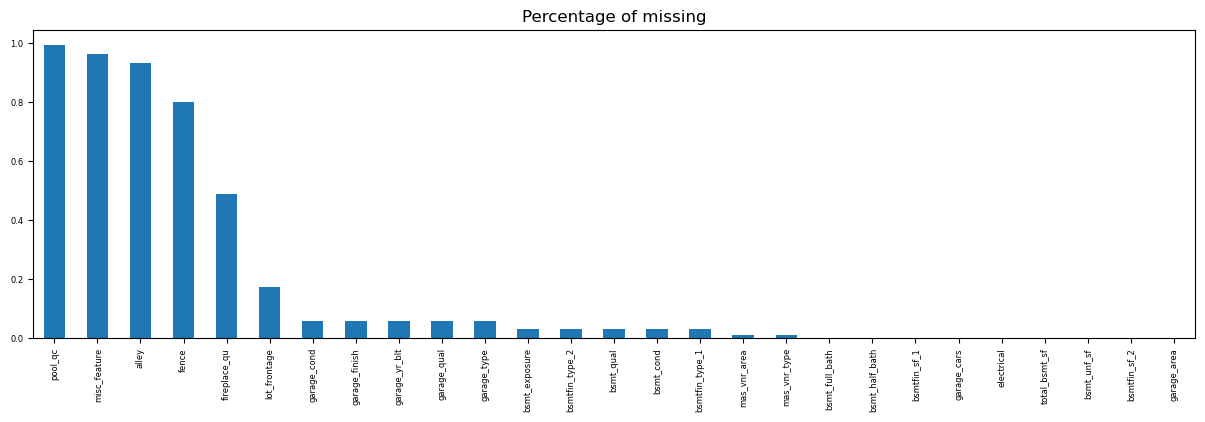

In [10]:
df.isna().mean().sort_values(ascending=False).loc[lambda x: x > 0].plot(kind="bar", figsize=(15, 4), title="Percentage of missing", fontsize=6);

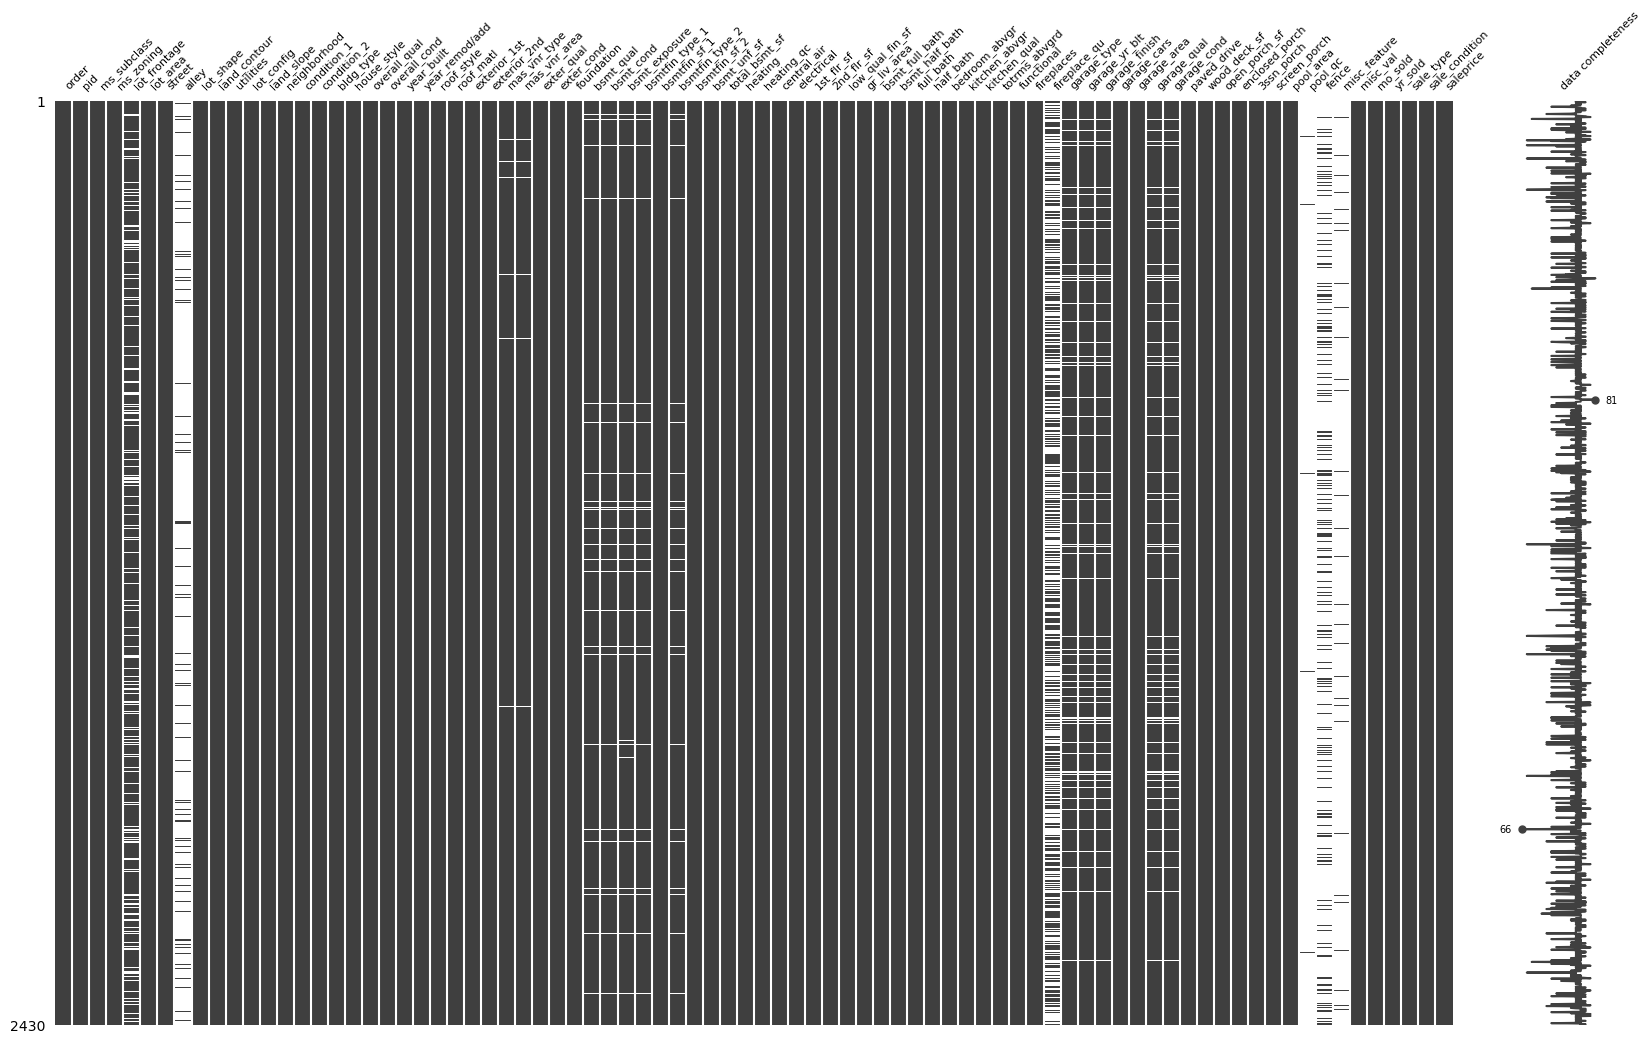

In [11]:
# The missingno library to helps us to visualize where the missing are located in the whole data frame
import missingno as msno
msno.matrix(df, labels=True, fontsize=8, figsize=(20,12));

The two previous charts provide visualizations of the missing values in the dataset. They reveal valuable insights regarding the presence of missing values in different columns.

From the charts, it is evident that certain columns have a significant number of missing values, exceeding 50% of the total values. These columns include "pool_qc," "misc_feature," "alley," and "fence." To handle these missing values, it is recommended to drop these columns from the dataset since a large proportion of the data is missing.

On the other hand, there are columns with a relatively lower percentage of missing values, less than 20%. For these columns, it may be worthwhile to attempt filling in the missing values using appropriate techniques.

### Number of values in each columns

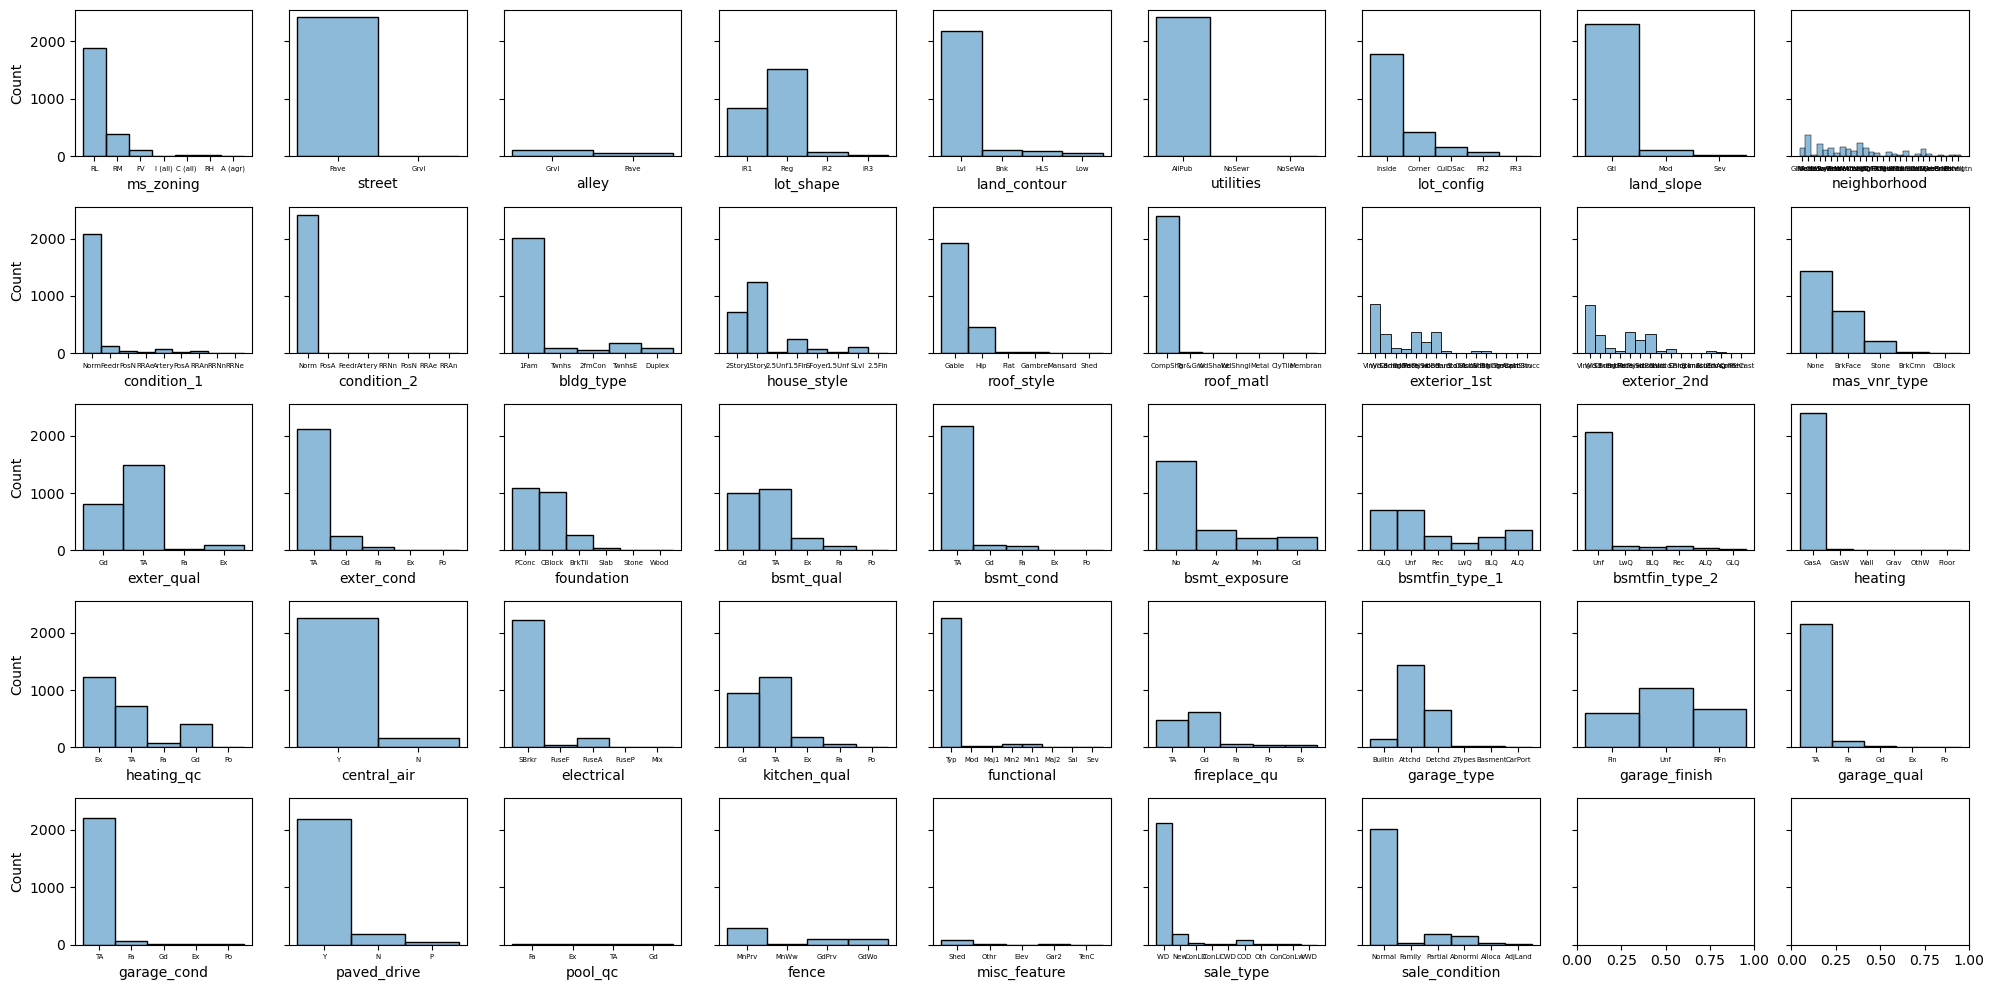

In [12]:
# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows=5, ncols=9, figsize=(20, 10), sharey=True)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, col in enumerate(str_cols):
    sns.histplot(data=df, x=col, ax=axes[i], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', labelsize=5)

fig.tight_layout()
plt.show()

The previous graphic provides insights into the number of unique values per column. By analyzing the chart, we can observe certain patterns:
- Columns like 'neighborhood', 'exterior_1st', and 'bsmtfin_type_1' exhibit a wide range of distinct values. These columns display a homogeneous distribution, suggesting diverse categories within these features.
- In contrast, columns such as 'street', 'alley', and 'utilities' have only two or three distinct values. Additionally, most of the entries within these columns are concentrated in just one category. This indicates a lack of variability and limited diversity within these features.

Overall, these observations highlight the variability and distribution patterns present in the dataset, showcasing both columns with abundant distinct values and columns with limited variation.

## Data cleaning

In the next two sections, I will assess the quality of the data column by column, and additionally perform data suppression, replacement, and other necessary actions.

### Qualitative data

#### Pool QC and pool area

In [13]:
# quantity of nan 
df['pool_qc'].isna().sum()

2418

In [14]:
df.loc[df['pool_area'] != 0 , ['pool_area', 'pool_qc']]

pool_area pool_qc
93          648      Fa
102         555      Ex
272         228      Ex
321         144      Ex
786         519      Fa
979         561      TA
1500        480      Gd
1582        512      Ex
2048        576      Gd
2239        444      TA
2274        800      Gd
2406        368      TA

Based on the analysis, it is evident that the 'pool_qc' column is almost empty, with only 12 filled rows. Additionally, there is a direct correlation between the data in the 'pool_qc' and 'pool_area' columns. Therefore, the decision has been made to drop these rows from the dataset.

In [15]:
# drop columns
df = df.drop(['pool_area', 'pool_qc'], axis=1)

#remove column names from the list
str_cols.remove('pool_qc')
int_cols.remove('pool_area')

#df shape
df.shape

(2430, 80)

#### Missing values

Due to the high percentage of missing values (more than 48%), the decision was made to drop the columns 'Misc Feature', 'Alley', 'Fence', and 'Fireplace Quality' from the dataset.

In [16]:
col_to_drop = ['misc_feature', 'alley', 'fence', 'fireplace_qu']

# drop column
df = df.drop(col_to_drop, axis=1)

# remove dropped columns from str_cols list
str_cols = [col for col in str_cols if col not in col_to_drop]

#df shape
df.shape

(2430, 76)

#### Garage

In [17]:
# filter columns containing "garage"
garage_cols = list(df.filter(like='garage').columns)

df[garage_cols].head()

garage_type  garage_yr_blt garage_finish  garage_cars  garage_area  \
0     BuiltIn         2000.0           Fin          2.0        554.0   
1      Attchd         1951.0           Unf          2.0        400.0   
2      Attchd         1970.0           Unf          1.0        286.0   
3      Attchd         1959.0           RFn          2.0        447.0   
4      Detchd         1960.0           Unf          1.0        308.0   

  garage_qual garage_cond  
0          TA          TA  
1          TA          TA  
2          TA          TA  
3          TA          TA  
4          TA          TA

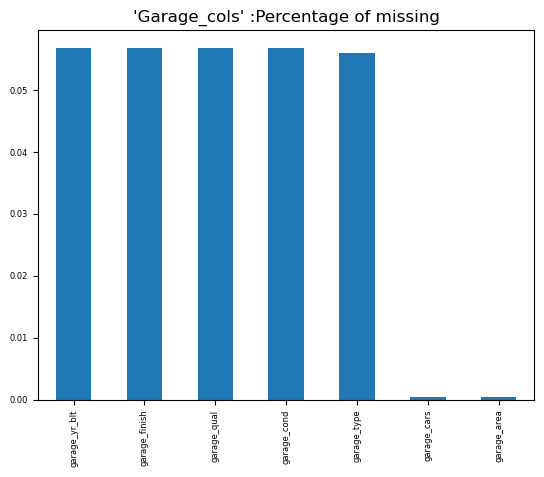

In [18]:
df[garage_cols].isna().mean().sort_values(ascending=False).loc[lambda x: x > 0].plot(kind="bar", title="'Garage_cols' :Percentage of missing", fontsize=6)
plt.show()

To ensure consistency in the garage data, an examination was conducted to verify that when the 'Garage Type' column is filled, all other garage-related columns should also be filled. As a result of this check, two rows were identified where this consistency was not met. Consequently, these two rows will be dropped from the dataset.

In [19]:
df.loc[(df['garage_type'].notna()) & df['garage_qual'].isna(), garage_cols]

garage_type  garage_yr_blt garage_finish  garage_cars  garage_area  \
1114      Detchd            NaN           NaN          1.0        360.0   
1565      Detchd            NaN           NaN          NaN          NaN   

     garage_qual garage_cond  
1114         NaN         NaN  
1565         NaN         NaN

In [20]:
df = df.drop(df[(df['garage_type'].notna()) & (df['garage_qual'].isna())].index)

#df shape
df.shape

(2428, 76)

#### Distinct values per column

In data exploration part, we saw columns such as 'street' and 'utilities' that have only two or three distinct values. Additionally, most of the entries within these columns are concentrated in just one category. This indicates a lack of variability and limited diversity within these features. Let's take a closer look at them.

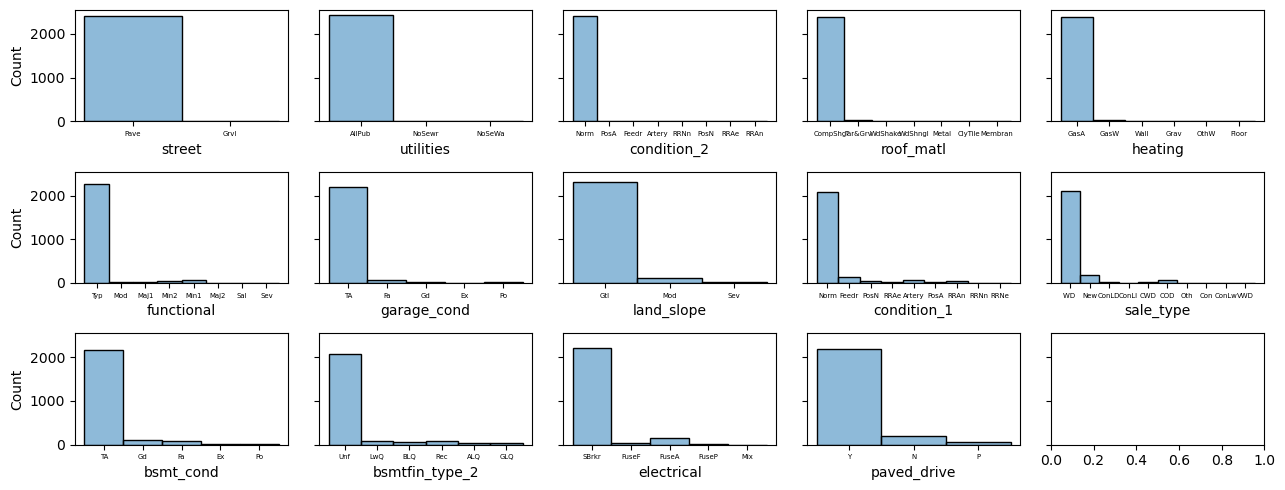

In [21]:
columns_to_plot = ['street', 'utilities', 'condition_2', 'roof_matl', 'heating', 'functional', 'garage_cond', 'land_slope', 'condition_1', 'sale_type', 'bsmt_cond', 'bsmtfin_type_2', 'electrical', 'paved_drive']

# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(13, 5), sharey=True)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, col in enumerate(columns_to_plot):
    sns.histplot(data=df, x=col, ax=axes[i], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', labelsize=5)

fig.tight_layout()
plt.show()

Based on the previous chart, it is evident that certain columns predominantly contain a single value. As a result, a decision has been made to drop these rows, as they will not significantly impact the prediction of the house price.

In [22]:
# drop columns
df = df.drop( ['street', 'utilities', 'condition_2', 'roof_matl', 'heating', 'functional', 'garage_cond', 'land_slope', 'condition_1', 'sale_type', 'bsmt_cond', 'bsmtfin_type_2', 'electrical', 'paved_drive'], axis=1)

#df shape
df.shape

(2428, 62)

#### Exterior covering on house

Verify if 'exterior_1st' and 'exterior_2nd' have distinct values.

In [23]:
df.loc[df['exterior_1st'] != df['exterior_2nd'], ['exterior_1st', 'exterior_2nd']]

exterior_1st exterior_2nd
2         CemntBd      CmentBd
18        Wd Sdng      Plywood
35        BrkFace      Wd Sdng
46        Plywood      Wd Sdng
47        HdBoard      Wd Sdng
...           ...          ...
2395      WdShing      Wd Shng
2396       CBlock      VinylSd
2397      BrkFace      Wd Sdng
2400      HdBoard      Plywood
2411      CemntBd      CmentBd

[351 rows x 2 columns]

There are 250 rows in the dataset where the value of the "exteriors_1st" column differs from the value in the "exteriors_2nd" column, accounting for approximately 10% of the data. Since the "exteriors_2nd" column represents the exterior covering on the house when there are multiple materials, and it is predominantly similar to the "exteriors_1st" column, it does not accurately reflect the primary exterior covering used. Therefore, I have decided to drop the "exteriors_2nd" column from the dataset.

In [24]:
# drop column
df = df.drop('exterior_2nd', axis=1)

#remove 'exterior_2nd' from the list str_cols
str_cols.remove('exterior_2nd')

#df shape
df.shape

(2428, 61)

### Quantitative data

#### First look at the data

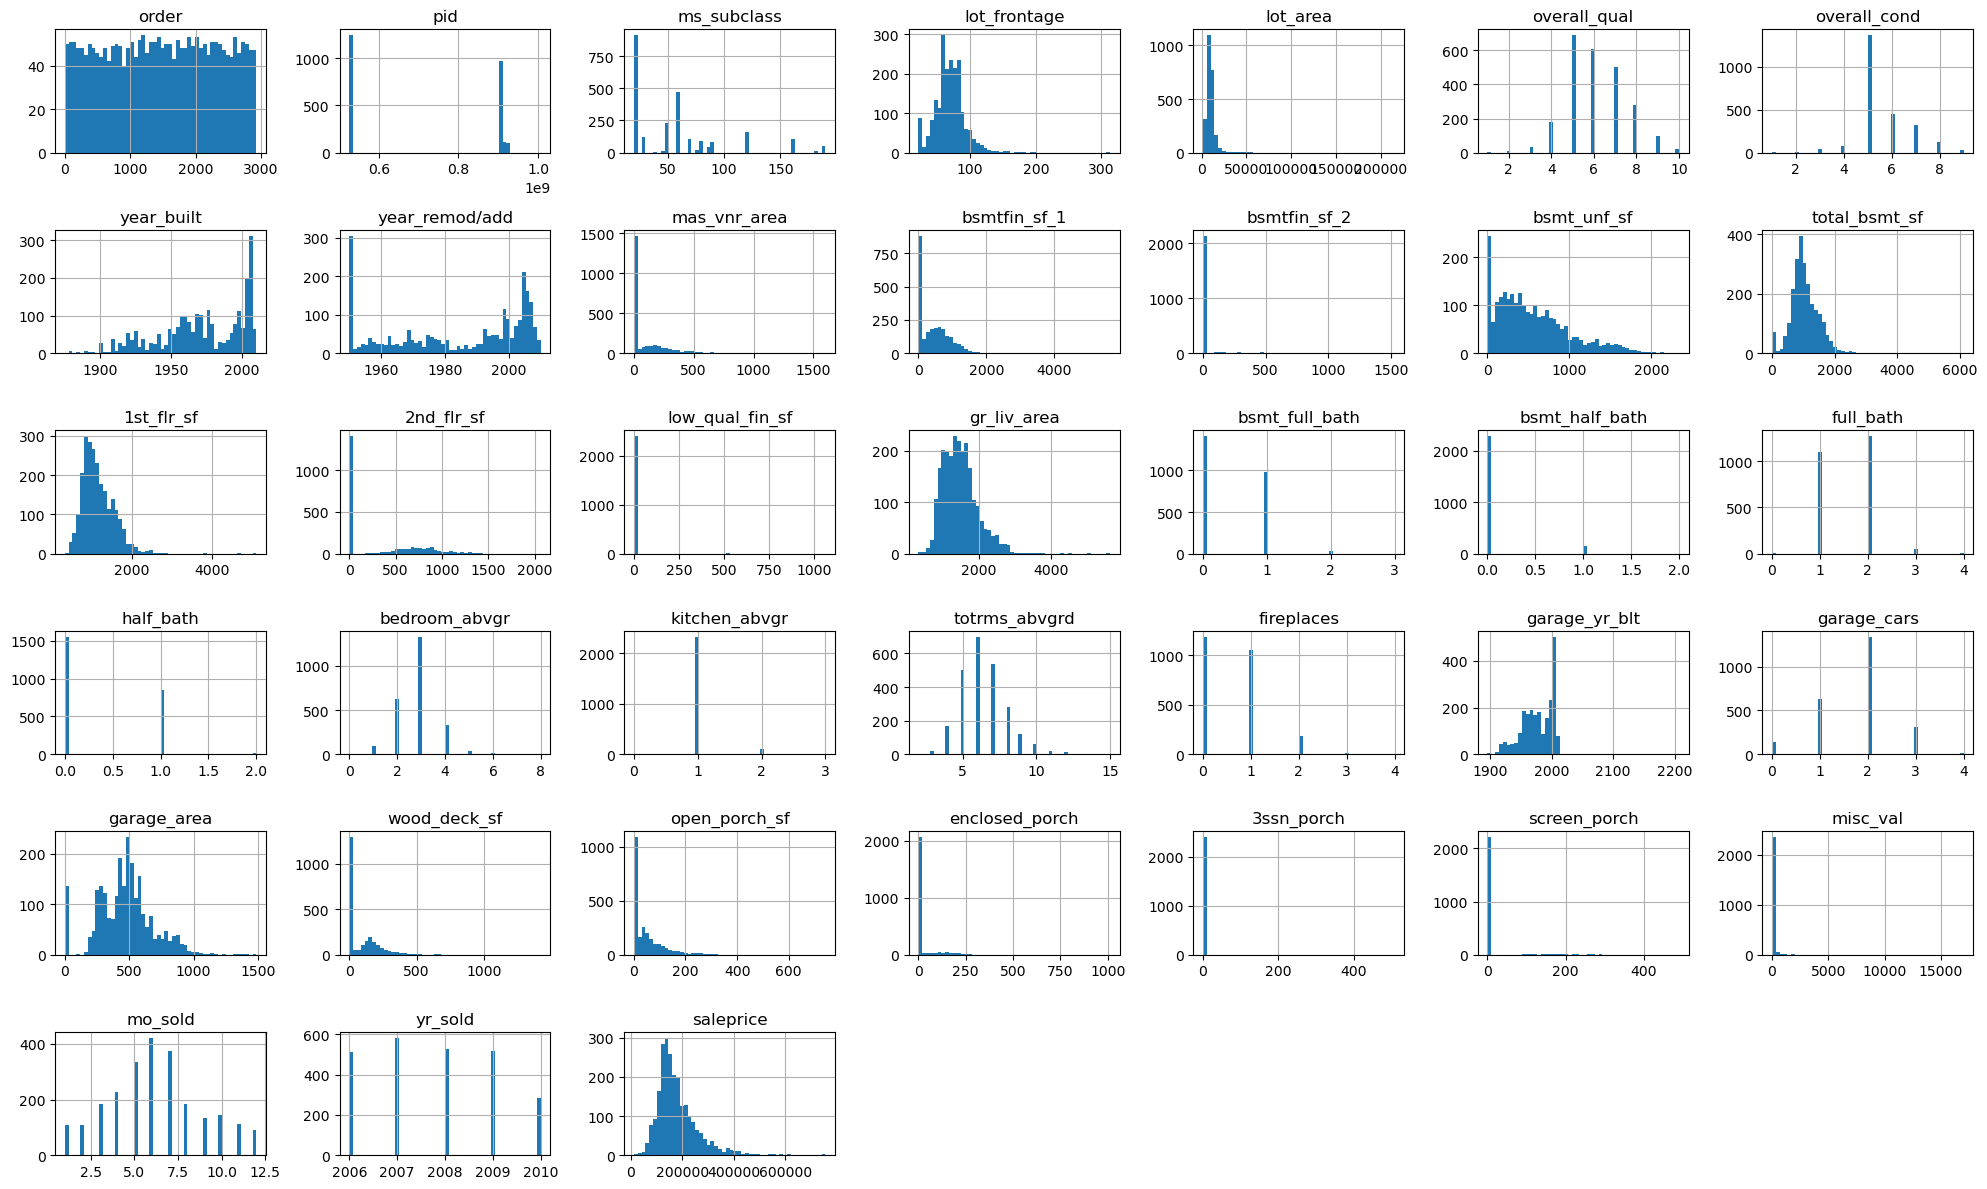

In [25]:
# Plot histograms
df.hist(bins=50, figsize=(20,12), layout=(-1, 7))
plt.tight_layout()
plt.show()

#### identifiers : Order and PID

Columns such as order and PID can be drop because they are identification number and will not affect the sales prices 

In [26]:
#Evaluate the number of duplicated values for order and pid
print("Number of duplicated value for 'order' : ", df.order.nunique() - df.shape[0])
print("Number of duplicated value for 'pid' : ", df.pid.nunique()-df.shape[0])

# drop column
df = df.drop(['order', 'pid'], axis=1)

#df shape
print('\nShape of df :', df.shape)

Number of duplicated value for 'order' :  0
Number of duplicated value for 'pid' :  0

Shape of df : (2428, 59)


#### Lot Frontage (Continuous): Linear feet of street connected to property

This column indicates the presence of properties that are not connected to the street, which appears to be inconsistent. To address this, I have decided to replace these values with the median value.

In [27]:
#Evaluate the number of NaN values
print("Number of NaN value for lot_frontage : ", df[df['lot_frontage'].isna()].shape[0])

df['lot_frontage'].fillna(df['lot_frontage'].median(), inplace=True)

print('\n Column is filled by median value which is :', df['lot_frontage'].median())

Number of NaN value for lot_frontage :  420

 Column is filled by median value which is : 68.0


#### Year Built (Discrete): Original construction date

check if the value is year_remod/add appears after year_built

In [28]:
print("Number of rows where year_remod/add < 'year_built' : ", df[df['year_remod/add'] < df['year_built']].shape[0])

Number of rows where year_remod/add < 'year_built' :  0


No data found. but i noticed that a lot of data where filled in the column 'year_remod/add' with the value 1950 (which is the min). 
when we look at the plot it seems abnormal nevertheless the qty of data (more than 10% of the dataset) is too important to be droped so i decided to filled with the value of 'year_built' when the value of df['year_remod/add'] == 1950

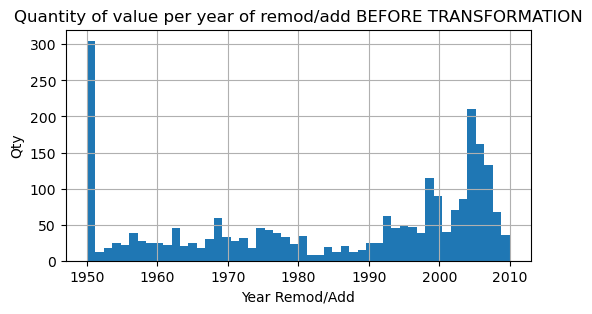

In [29]:
df['year_remod/add'].hist(bins=50, figsize=(6,3))
plt.xlabel("Year Remod/Add")
plt.ylabel("Qty")
plt.title('Quantity of value per year of remod/add BEFORE TRANSFORMATION')
plt.show()

In [30]:
print("Before transformation, number of rows where 'year_remod/add' is egale to 1950 : ", df[df['year_remod/add'] == 1950].shape[0])

Before transformation, number of rows where 'year_remod/add' is egale to 1950 :  294


In [31]:
# fill the value of column 'year_remod/add' with the value of column 'year_built' where value 1950 appears in column 'year_remod/add'
df.loc[df['year_remod/add'] == 1950, 'year_remod/add'] = df.loc[df['year_remod/add'] == 1950, 'year_built']

In [32]:
print("After transformation, number of rows where 'year_remod/add' is egale to 1950 : ", df[df['year_remod/add'] == 1950].shape[0])

After transformation, number of rows where 'year_remod/add' is egale to 1950 :  16


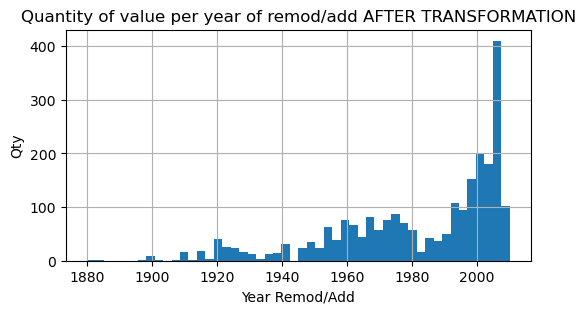

In [33]:
df['year_remod/add'].hist(bins=50, figsize=(6,3))
plt.xlabel("Year Remod/Add")
plt.ylabel("Qty")
plt.title('Quantity of value per year of remod/add AFTER TRANSFORMATION')
plt.show()

#### Mas Vnr Area (Continuous): Masonry veneer area in square feet

In [34]:
print('Number of NaN :', df[df.mas_vnr_area.isna()].shape[0])

# drop rows
df = df.dropna(subset=['mas_vnr_area'], axis=0)

#df shape
print('\nShape of df :', df.shape)

Number of NaN : 20

Shape of df : (2408, 59)


Since it represents a small portion of the data, I have decided to remove these 20 rows.

#### Total Bsmt SF (Continuous): Total square feet of basement area

In [35]:
print('Number of NaN :', df[df.total_bsmt_sf.isna()].shape[0])

# drop rows
df = df.dropna(subset=['total_bsmt_sf'], axis=0)

#df shape
print('\nShape of df :', df.shape)

Number of NaN : 1

Shape of df : (2407, 59)


Let's check if, when the value of 'total_bsmt_sf' is 0, all other columns containing "bsmt" also have a value of 0. If no discrepancies are found, it means there are no gaps in the data.

In [36]:
df.loc[df['total_bsmt_sf']==0, ['total_bsmt_sf','bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf']].sum()

total_bsmt_sf    0.0
bsmtfin_sf_1     0.0
bsmtfin_sf_2     0.0
bsmt_unf_sf      0.0
dtype: float64

#### Garage Yr Blt (Discrete): Year garage was built

In [37]:
print('Maximum date for garage_yr_blt :', df.garage_yr_blt.max())

Maximum date for garage_yr_blt : 2010.0


OK No inconsistency found

I also want to verify if the values in the "garage_yr_blt" column are consistently older than or equal to the corresponding values in the "year_built" column. If this condition is not met, it suggests that the garage was built before the house, which is likely an error.

In [38]:
print("Number of rows where 'garage_yr_blt' < 'year_built' : ", df[df['garage_yr_blt'] < df['year_built']].shape[0])

Number of rows where 'garage_yr_blt' < 'year_built' :  16


In [39]:
# Replace the values in the 'garage_yr_blt' column with the corresponding 'year_built' 
# value whenever 'garage_yr_blt' is less than 'year_built' 
df.loc[df['garage_yr_blt'] < df['year_built'], 'garage_yr_blt'] = df['year_built']

I have observed 135 rows in which the "garage_yr_blt" column is filled with "np.nan" values. To prevent having NaN values in my DataFrame, I intend to replace these values. It is worth noting that the NaN values in this column indicate the absence of a garage.

Since we still have information available in the "garage_area" and "garage_cars" columns, where both values are equal to 0 when there is no garage, I have decided to remove these rows from the DataFrame.

In [40]:
df['garage_yr_blt'].isna().sum()

135

In [41]:
df.loc[df['garage_yr_blt'].isna(), ['garage_yr_blt','garage_area', 'garage_cars']]

garage_yr_blt  garage_area  garage_cars
16              NaN          0.0          0.0
48              NaN          0.0          0.0
62              NaN          0.0          0.0
73              NaN          0.0          0.0
76              NaN          0.0          0.0
...             ...          ...          ...
2292            NaN          0.0          0.0
2308            NaN          0.0          0.0
2314            NaN          0.0          0.0
2354            NaN          0.0          0.0
2425            NaN          0.0          0.0

[135 rows x 3 columns]

In [42]:
# drop column
df = df.drop('garage_yr_blt', axis=1)

#df shape
print('\nShape of df :', df.shape)


Shape of df : (2407, 58)


#### Garage Area (Continuous): Size of garage in square feet

check if garage area ==0 all the other columns that cotains "garage"=0 as well

In [43]:
df.loc[df['garage_area']==0, ['garage_area','garage_cars']].sum()

garage_area    0.0
garage_cars    0.0
dtype: float64

ok no gaps found

#### Columns filled mostly with zero

In [44]:
#compute the qty of zero value in every columns:
qty_zero_values = df.eq(0).sum().sort_values(ascending = False) #count the number 0
percent_zero_values = (qty_zero_values/df.shape[0])*100 
df_zero_values = pd.concat([qty_zero_values, percent_zero_values.round(1)], axis=1, keys=['qty_zero_values', 'percent_zero_values'])
df_zero_values[df_zero_values['percent_zero_values']>0].head(15)

qty_zero_values  percent_zero_values
3ssn_porch                  2378                 98.8
low_qual_fin_sf             2377                 98.8
misc_val                    2320                 96.4
bsmt_half_bath              2263                 94.0
screen_porch                2189                 90.9
bsmtfin_sf_2                2114                 87.8
enclosed_porch              2035                 84.5
half_bath                   1543                 64.1
mas_vnr_area                1435                 59.6
bsmt_full_bath              1398                 58.1
2nd_flr_sf                  1394                 57.9
wood_deck_sf                1259                 52.3
fireplaces                  1174                 48.8
open_porch_sf               1071                 44.5
bsmtfin_sf_1                 763                 31.7

We can notice that columns are filled mostly with zero value and will not influence correlation. I decide to drop all columns that have more than 80% of zero values

In [45]:
# mask which has 'True' when 'percent_null_values' is greater than 95
entries_to_drop = df_zero_values[df_zero_values['percent_zero_values'].gt(80)]
entries_to_drop = entries_to_drop.index.tolist()

# Dropping these entries by selecting the samples that should be dropped
df = df.drop(entries_to_drop, axis=1)

df.shape #shape of remaining data

(2407, 51)

#### Living Area

Check if the sum of 1st and 2nd floor is egale to the ground surface area.

In [46]:
print("Number of rows where 'gr_liv_area' != '1st_flr_sf' + '2nd_flr_sf' : ", df[df['gr_liv_area'] != df['1st_flr_sf'] + df['2nd_flr_sf']].shape[0])

Number of rows where 'gr_liv_area' != '1st_flr_sf' + '2nd_flr_sf' :  30


In [47]:
# drop rows where 1st + 2nd floor surface is different from ground surface area
df = df.drop(df[df['gr_liv_area'] != df['1st_flr_sf'] + df['2nd_flr_sf']].index)

#df shape
print('\nShape of df :', df.shape)


Shape of df : (2377, 51)


Because these three features are correlated, i decided to drop '2nd_flr_sf' from the dataframe.

In [48]:
df = df.drop('2nd_flr_sf', axis=1)
#df shape
print('\nShape of df :', df.shape)


Shape of df : (2377, 50)


#### Basement surface

check if the sum of basement unfinished and finished surface is egale to the basement surface area

In [49]:
# Replace NaN with 0
df_filled = df.fillna(0)

df[df_filled['total_bsmt_sf'] != df_filled['bsmtfin_sf_1']+ df_filled['bsmt_unf_sf']]

print("Number of rows where 'total_bsmt_sf' != 'bsmtfin_sf_1' + 'bsmt_unf_sf' : ", df_filled[df_filled['total_bsmt_sf'] != df_filled['bsmtfin_sf_1']+ df_filled['bsmt_unf_sf']].shape[0])

Number of rows where 'total_bsmt_sf' != 'bsmtfin_sf_1' + 'bsmt_unf_sf' :  290


because these three features are correlated, i decided to drop 'bsmtfin_sf_1' from the dataframe.

In [50]:
df = df.drop('bsmtfin_sf_1', axis=1)
#df shape
print('\nShape of df :', df.shape)


Shape of df : (2377, 49)


#### bsmt_full_bath

In [51]:
print("Number of nan values in 'bsmt_full_bath'", df['bsmt_full_bath'].isna().sum())

# Replace the NaN values in a column with the most frequently occurring value
df['bsmt_full_bath'].fillna(df['bsmt_full_bath'].mode().iloc[0], inplace=True)

Number of nan values in 'bsmt_full_bath' 1


#### NaN Values

In [52]:
# Count the number of NaN values in each column
nan_counts = df.select_dtypes(include='number').isna().sum()

# Take the top 5 values
#top_10_nan_counts = 
nan_counts.sort_values(ascending=False)[:5]

ms_subclass      0
lot_frontage     0
yr_sold          0
mo_sold          0
open_porch_sf    0
dtype: int64

There are no NaN values present in the 'number' columns.

In [53]:
#df shape
print('\nShape of df :', df.shape)


Shape of df : (2377, 49)


### Outliers removal

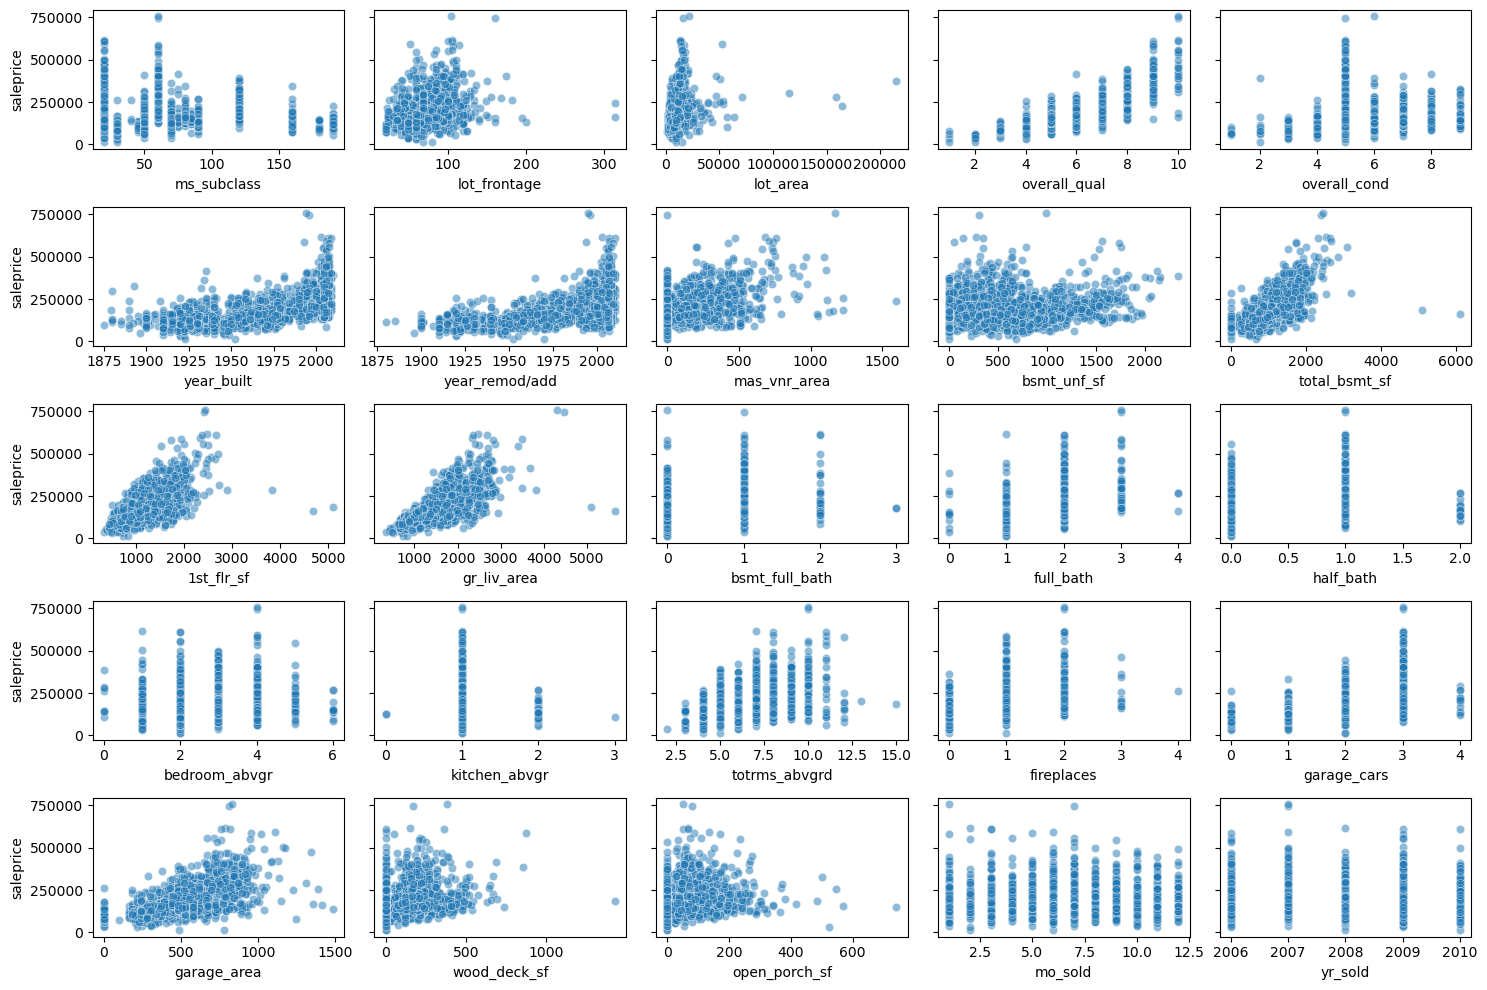

In [54]:
# Define the columns to plot
columns_to_plot = df.select_dtypes(include="number").columns.tolist()
columns_to_plot.remove('saleprice')

# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize=(15, 10), sharey=True)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(data=df, 
                    x=col, 
                    y="saleprice", 
                    ax=axes[i], 
                    alpha=0.5
               )
    axes[i].set_ylabel('saleprice')
    axes[i].set_xlabel(col)
#axes[i].set_title('salesprice vs. '+col)

fig.tight_layout()
plt.show()

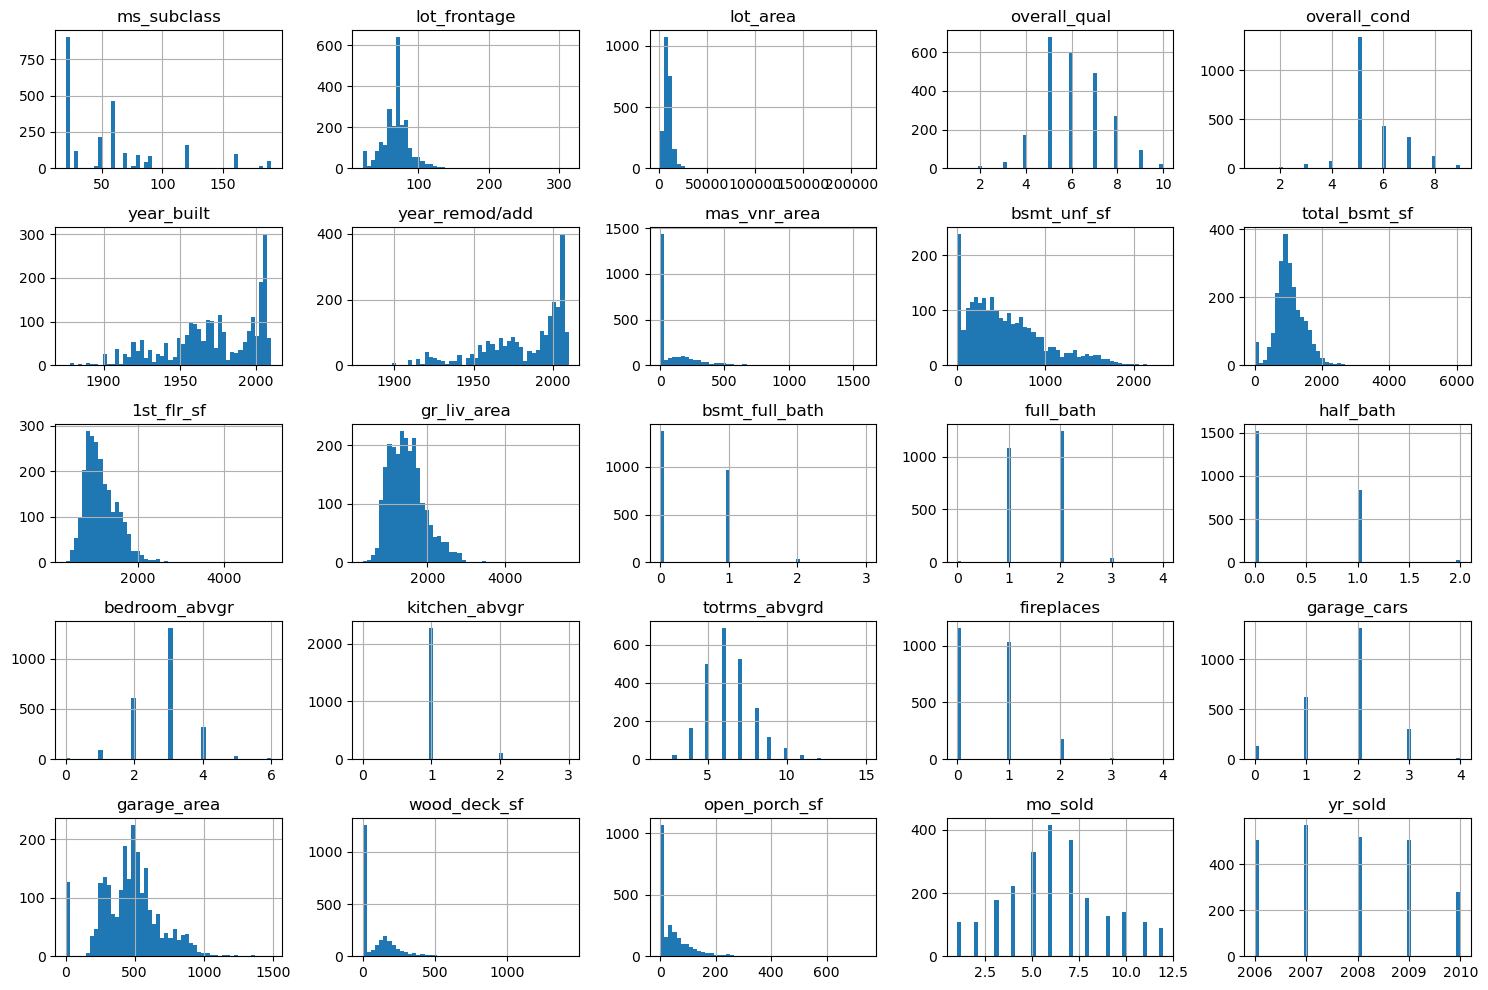

In [55]:
df[columns_to_plot].hist(bins=50, figsize=(15,10), layout=(-1, 5))
plt.tight_layout()
plt.show()

The two previous plots enable us to visually inspect the data, facilitating the identification of outliers and the establishment of boundaries for them.

#### Manual removal outliers

In [56]:
# function drop_entries that takes the DataFrame (df), column name (column), and threshold value (threshold) as inputs. 
# It performs the filtering, counts the dropped entries, updates the DataFrame, and returns the modified DataFrame and the count of dropped entries.

def drop_entries(df, column, lower_threshold, upper_threshold):
    filter = df[column].gt(upper_threshold) | df[column].lt(lower_threshold)
    dropped_entries = filter.sum()
    df = df[~filter]
    return df, dropped_entries

In [57]:
df, dropped_lot_area = drop_entries(df, "lot_area", 0, 25000)
print("Number of entries dropped in 'lot_area':", dropped_lot_area)

df, dropped_mas_vnr_area = drop_entries(df, "mas_vnr_area", 0, 750)
print("Number of entries dropped in 'mas_vnr_area':", dropped_mas_vnr_area)

df, dropped_wood_deck_sf = drop_entries(df, "wood_deck_sf", 0, 600)
print("Number of entries dropped in 'wood_deck_sf':", dropped_wood_deck_sf)

df, dropped_gr_liv_area = drop_entries(df, "gr_liv_area", 0, 3000)
print("Number of entries dropped in 'gr_liv_area':", dropped_gr_liv_area)

df, dropped_garage_area = drop_entries(df, "garage_area", 0, 1200)
print("Number of entries dropped in 'garage_area':", dropped_garage_area)

df, dropped_open_porch_sf = drop_entries(df, "open_porch_sf", 0, 300)
print("Number of entries dropped in 'open_porch_sf':", dropped_open_porch_sf)

df, dropped_kitchen_abvgr = drop_entries(df, "kitchen_abvgr", 1, 2)
print("Number of entries dropped in 'kitchen_abvgr':", dropped_kitchen_abvgr)

Number of entries dropped in 'lot_area': 41
Number of entries dropped in 'mas_vnr_area': 22
Number of entries dropped in 'wood_deck_sf': 9
Number of entries dropped in 'gr_liv_area': 6
Number of entries dropped in 'garage_area': 6
Number of entries dropped in 'open_porch_sf': 17
Number of entries dropped in 'kitchen_abvgr': 3


In [58]:
#df shape
print('\nShape of df :', df.shape)


Shape of df : (2273, 49)


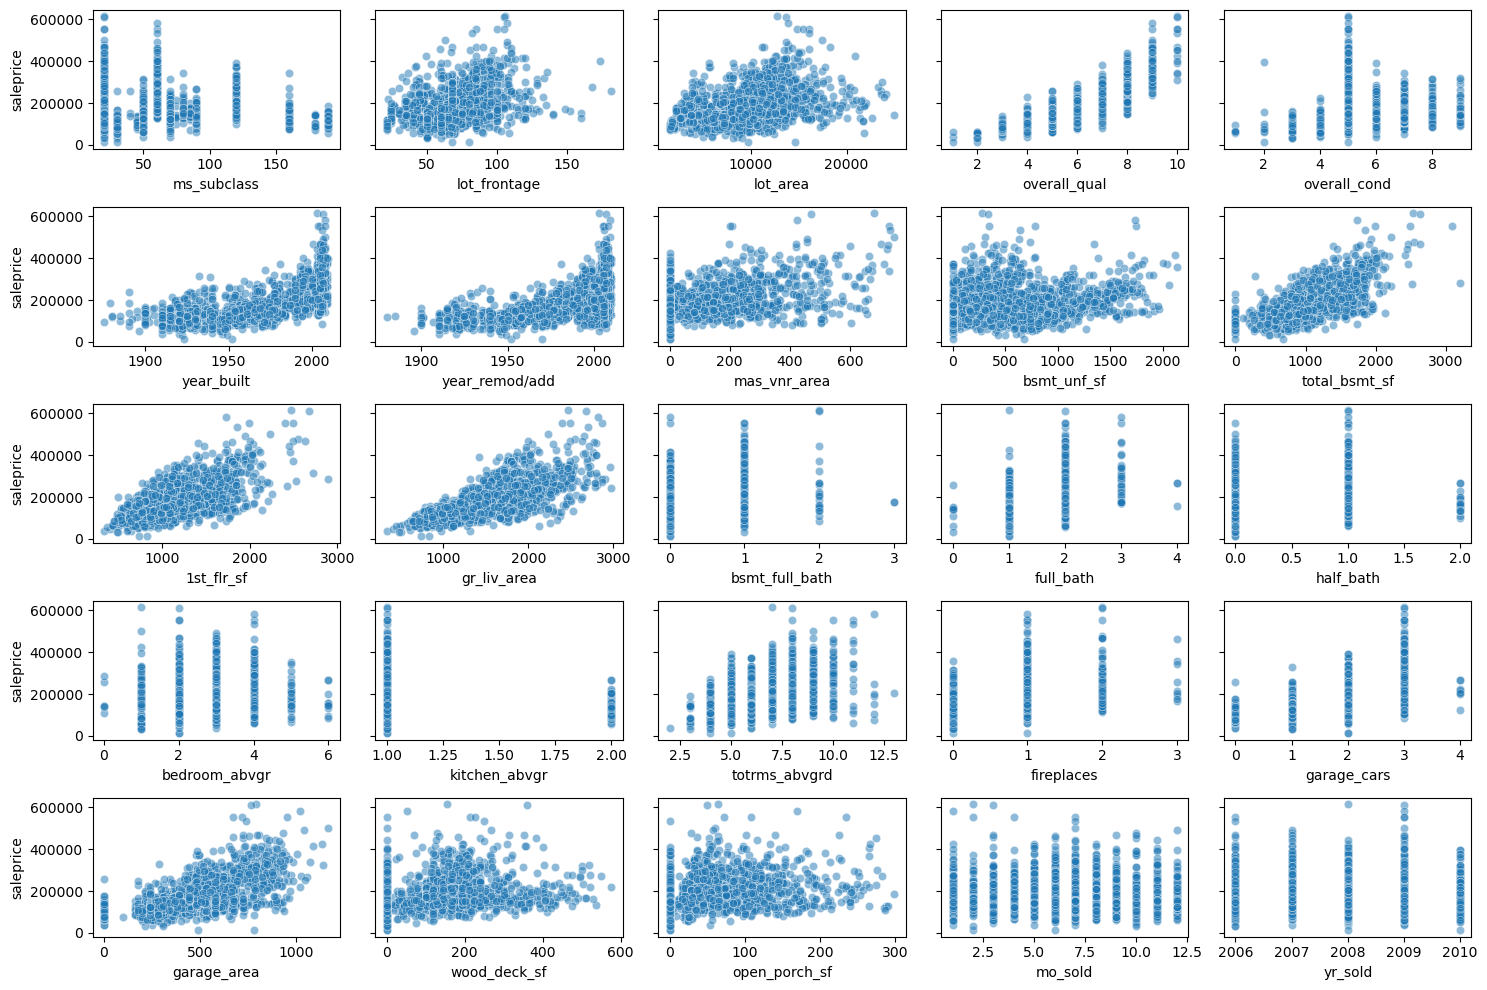

In [59]:
# Define the columns to plot
columns_to_plot = df.select_dtypes(include="number").columns.tolist()
columns_to_plot.remove('saleprice')

# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows = 5, ncols = 5, figsize=(15, 10), sharey=True)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(data=df, 
                    x=col, 
                    y="saleprice", 
                    ax=axes[i], 
                    alpha=0.5
               )
    axes[i].set_ylabel('saleprice')
    axes[i].set_xlabel(col)
#axes[i].set_title('salesprice vs. '+col)

fig.tight_layout()
plt.show()

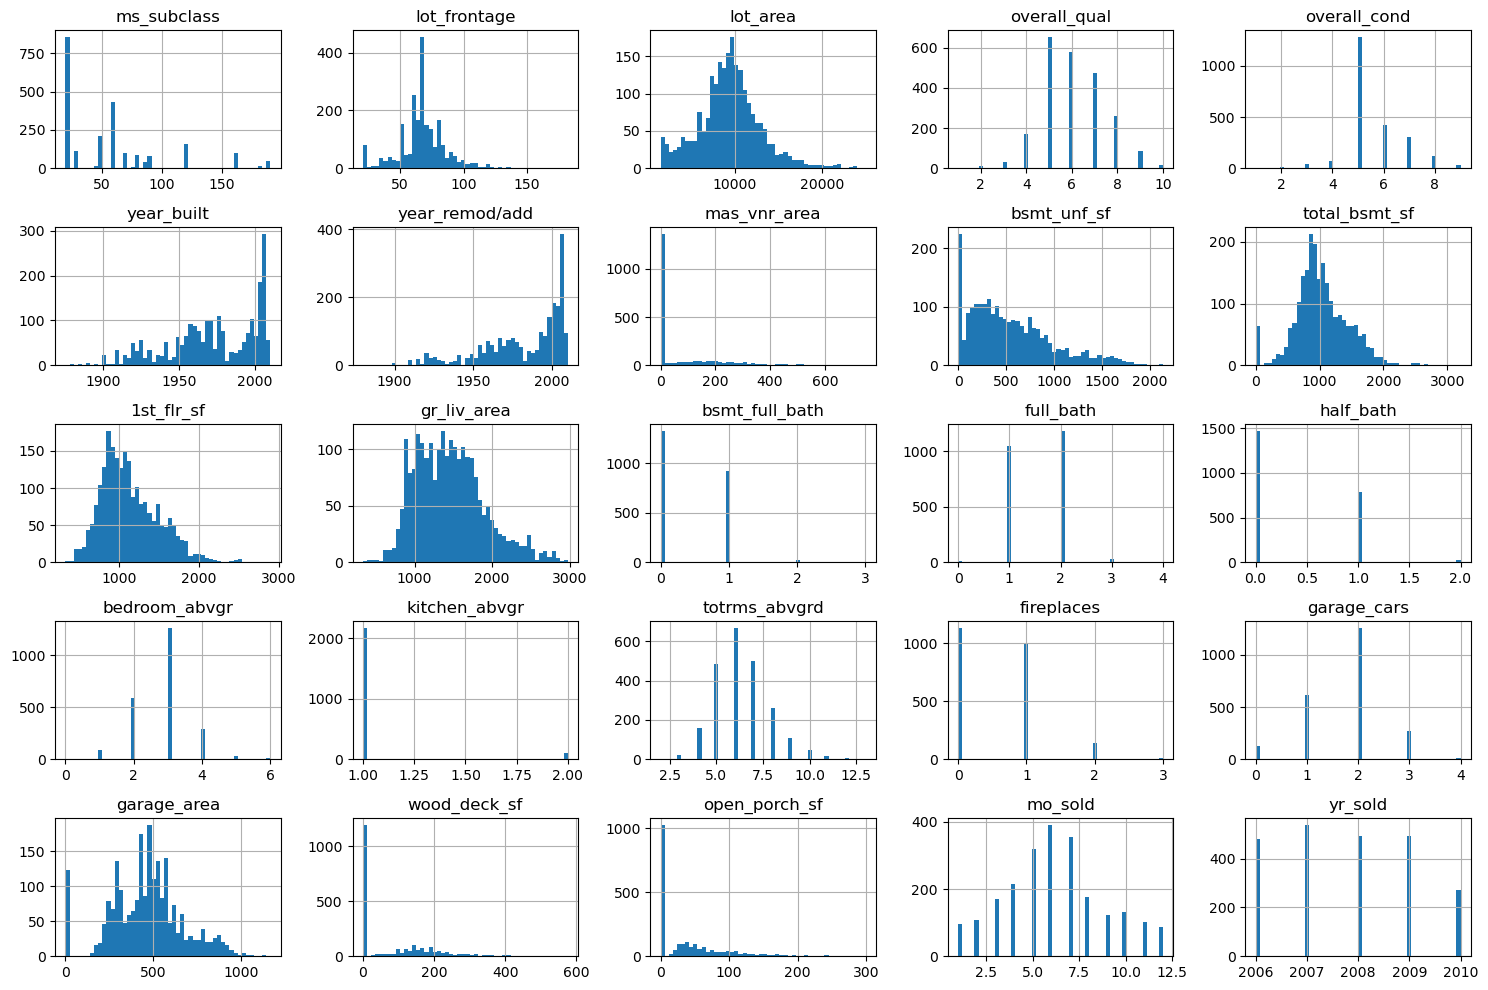

In [60]:
df[columns_to_plot].hist(bins=50, figsize=(15,10), layout=(-1, 5))
plt.tight_layout()
plt.show()

The two previous plots provide visual evidence that outliers have been effectively removed from the quantitative data.

## Feature engineering

### Sale Prices

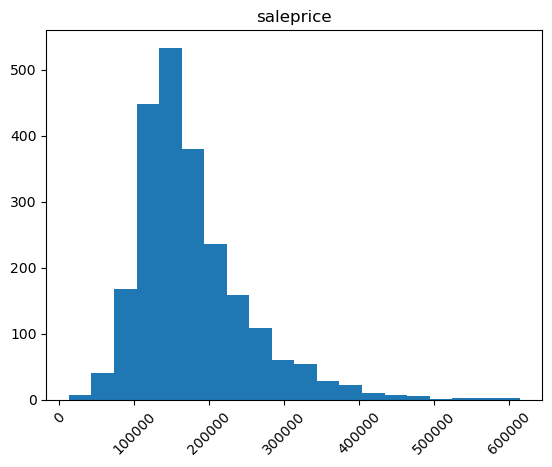

In [61]:
df.hist(column="saleprice", bins=20, grid=False, xrot=45)
plt.show()

To avoid building a model that is biased toward more expensive houses, we will apply the logarithm transformation and build a model that predicts the log of the sale price.

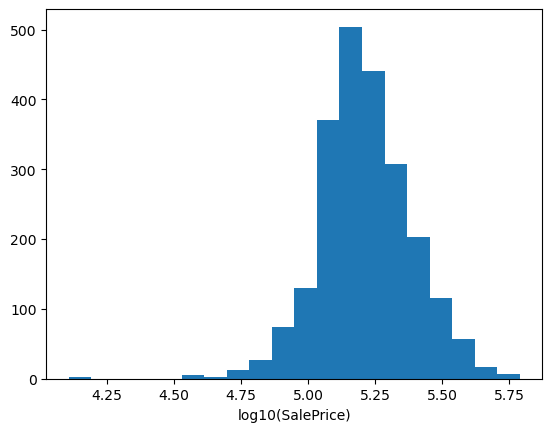

In [62]:
plt.hist(np.log10(df.saleprice), bins=20)
plt.xlabel("log10(SalePrice)")
plt.show()

In [63]:
# Generate a new row that corresponds to the logarithm of the price (log(Price)).
df['saleprice_log'] = np.log10(df.saleprice)

I observed two houses in the dataset that seemed to be sold at an unusually low price. Consequently, I made the decision to eliminate those two entries from the dataset.

In [64]:
# Select the two rows where the log(Price) values are below 4.5.
df[df['saleprice_log']<4.5]

ms_subclass ms_zoning  lot_frontage  lot_area lot_shape land_contour  \
491            20   A (agr)          80.0     14584       Reg          Low   
1757           30        RM          68.0      9656       Reg          Lvl   

     lot_config neighborhood bldg_type house_style  overall_qual  \
491      Inside       IDOTRR      1Fam      1Story             1   
1757     Inside      OldTown      1Fam      1Story             2   

      overall_cond  year_built  year_remod/add roof_style exterior_1st  \
491              5        1952            1952      Gable      AsbShng   
1757             2        1923            1970      Gable      AsbShng   

     mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
491          None           0.0         Fa         Po       Slab       NaN   
1757         None           0.0         TA         Fa     BrkTil        Fa   

     bsmt_exposure bsmtfin_type_1  bsmt_unf_sf  total_bsmt_sf heating_qc  \
491            NaN            NaN          0.0            0.0         Po   
1757            No            Unf        678.0          678.0         TA   

     central_air  1st_flr_sf  gr_liv_area  bsmt_full_bath  full_bath  \
491            N         733          733             0.0          1   
1757           N         832          832             0.0          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
491           0              2              1           Fa              4   
1757          0              2              1           TA              5   

      fireplaces garage_type garage_finish  garage_cars  garage_area  \
491            0      Attchd           Unf          2.0        487.0   
1757           1      Detchd           Unf          2.0        780.0   

     garage_qual  wood_deck_sf  open_porch_sf  mo_sold  yr_sold  \
491           Fa             0              0        2     2008   
1757          Fa             0              0        6     2010   

     sale_condition  saleprice  saleprice_log  
491         Abnorml      13100       4.117271  
1757        Abnorml      12789       4.106837

In [65]:
# Drop the two rows under 4.5 of saleprice_log
df, dropped_saleprice_log = drop_entries(df, "saleprice_log", 4.5, 999)
print("Number of entries dropped in 'saleprice_log':", dropped_saleprice_log)

Number of entries dropped in 'saleprice_log': 2


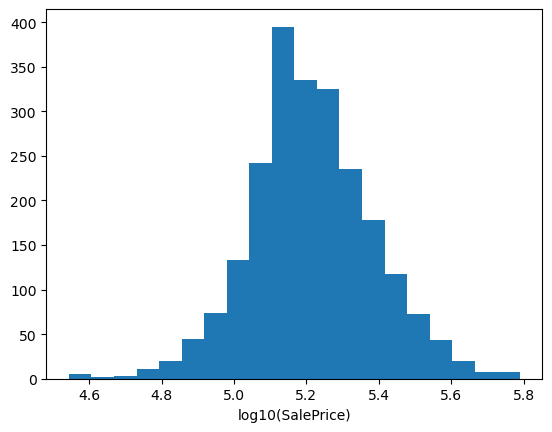

In [66]:
# Plot the saleprice_log
plt.hist(df['saleprice_log'], bins=20)
plt.xlabel("log10(SalePrice)")
plt.show()

In [67]:
# drop column
df = df.drop('saleprice', axis=1)

#df shape
print('\nShape of df :', df.shape)


Shape of df : (2271, 49)


### Overall Quality and condition

Since "overall_cond" and "overall_quality" are two features that individually rate the overall performance of houses, I have decided to create a unified parameter that combines both of these features. Subsequently, I will assess whether this combined parameter enhances the performance of the models.

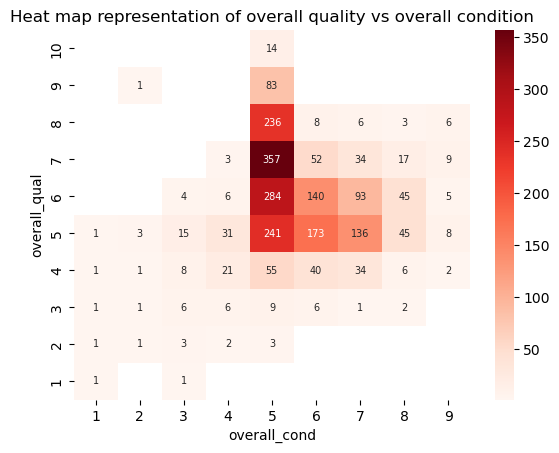

In [68]:
# Create a pivot table to count the number of items between overall quality and overall condition notation
table = df.pivot_table(index=df.overall_qual, columns=df.overall_cond, aggfunc='size') #, fill_value=0

# Draw the heatmap
sns.heatmap(table, cmap='Reds', annot=True, annot_kws={"fontsize": 7}, fmt=".0f")
plt.title("Heat map representation of overall quality vs overall condition")
plt.gca().invert_yaxis()
plt.show()

The heatmap presented above illustrates the data distribution in terms of filling for both "overall_qual" and "overall_cond". It is evident that quality and condition exhibit a strong correlation. For instance, there are no instances of high condition with low quality (and vice versa).

In order to consolidate the evaluation of quality and condition, I opted to create a unified parameter. By multiplying both parameters, the resulting score is bounded between 0 and 100.

In [69]:
# Creat a new column which use both quality and condition:
df['overall_qual_cond'] = df['overall_qual'] * df['overall_cond']

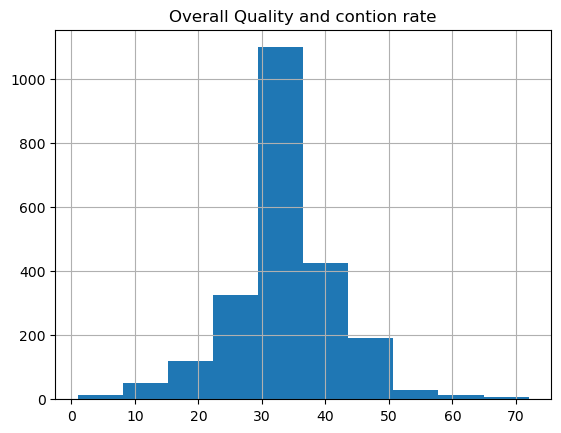

In [70]:
# Plot the new feature 
df['overall_qual_cond'].hist()
plt.title('Overall Quality and contion rate')
plt.show()

### Garage

In [71]:
# Get the list of columns containing "garage"
garage_columns = df.filter(like='garage').columns.tolist()
df[garage_columns].head()

garage_type garage_finish  garage_cars  garage_area garage_qual
0     BuiltIn           Fin          2.0        554.0          TA
1      Attchd           Unf          2.0        400.0          TA
2      Attchd           Unf          1.0        286.0          TA
3      Attchd           RFn          2.0        447.0          TA
4      Detchd           Unf          1.0        308.0          TA

Manual mapping of garage_finish and garage qual

In [72]:
scale_mapper = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'nan':0}
#replace np.nan values by "nan" in order to have only strings
df['garage_qual'] = df.garage_qual.fillna("nan")
df["garage_qual"] = df.garage_qual.replace(scale_mapper)

In [73]:
scale_mapper = {'Fin':3, 'RFn':2, 'Unf':1, 'nan':0}
#replace np.nan values by "nan" in order to have only strings
df['garage_finish'] = df.garage_finish.fillna("nan")
df["garage_finish"] = df.garage_finish.replace(scale_mapper)

In [74]:
df[garage_columns].head()

garage_type  garage_finish  garage_cars  garage_area  garage_qual
0     BuiltIn              3          2.0        554.0            3
1      Attchd              1          2.0        400.0            3
2      Attchd              1          1.0        286.0            3
3      Attchd              2          2.0        447.0            3
4      Detchd              1          1.0        308.0            3

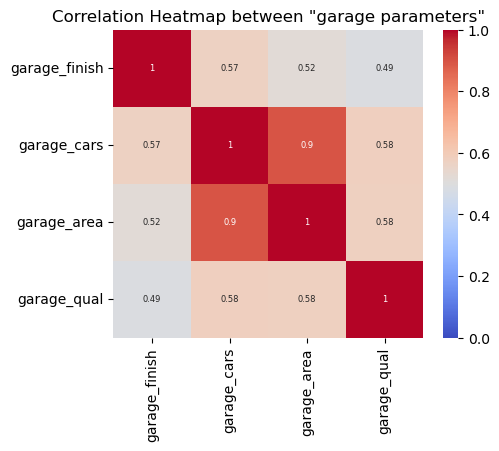

In [75]:
# Calculate the correlation matrix
correlation_matrix = df[garage_columns].corr()

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 6}, vmin=0, vmax=1)
plt.title('Correlation Heatmap between "garage parameters"')
plt.show()

The Heatmap reveals strong correlations among all the parameters, ranging from 0.52 between garage_finish and garage_qual, to 0.91 between garage_cars and garage_area. Considering these findings, I have made the decision to create a unified parameter by combining all four.

In [76]:
# Creat a new column which use both quality and condition:
df['garage_unified_param'] = df['garage_qual'] * df['garage_finish'] * df['garage_cars'] * df['garage_area']

In [77]:
# Replace nan by 0
df['garage_unified_param'] = df['garage_unified_param'].fillna(0)

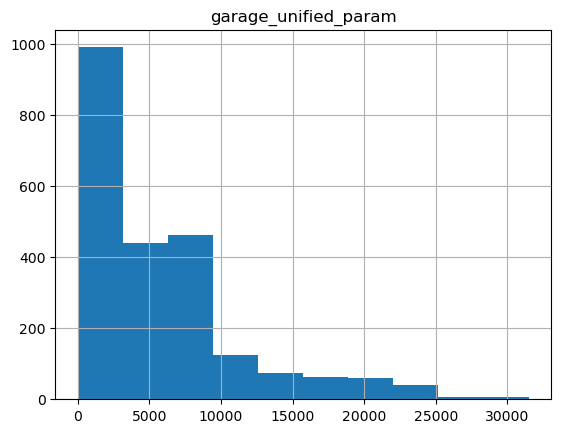

In [78]:
df['garage_unified_param'].hist()
plt.title('garage_unified_param')
plt.show()

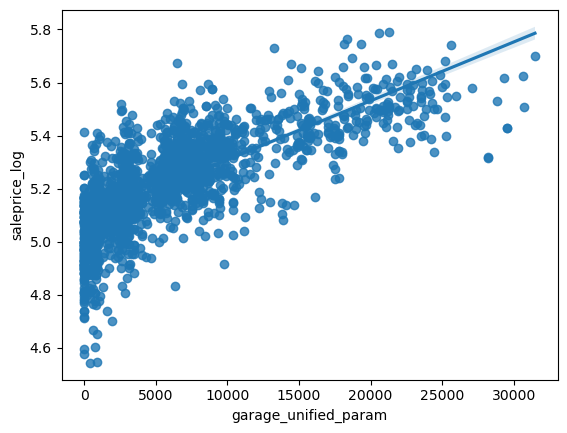

In [79]:
sns.regplot(x=df["garage_unified_param"], y=df["saleprice_log"])
plt.show()

After analyzing the correlation with the logarithm of the sales price, I have decided not to retain this feature parameter. 

Additionally, during the initial attempt with validation data (and with the 500 houses), the inclusion of this feature parameter did not lead to any improvement in the results.

In [80]:
# drop column
# df = df.drop(['garage_qual', 'garage_finish', 'garage_cars', 'garage_area'], axis=1)

df= df.drop(['garage_unified_param'], axis=1)

#df shape
df.shape

(2271, 50)

## Feature encoding

#### Ordinal variable

In [81]:
# Create a list of ordinal variables
ordinal_var = ['lot_shape', 'overall_qual', 'overall_cond', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_exposure', 
               'bsmtfin_type_1', 'heating_qc', 'kitchen_qual']

In [82]:
# create a second list of ordinal but without integer because they are already "encoded"
ordinal_var_str = df[ordinal_var].select_dtypes(exclude='number').columns.tolist()

In [83]:
df[ordinal_var_str].head()

lot_shape exter_qual exter_cond bsmt_qual bsmt_exposure bsmtfin_type_1  \
0       IR1         Gd         TA        Gd            No            GLQ   
1       Reg         TA         TA        TA            No            Unf   
2       Reg         TA         TA        TA            No            Unf   
3       IR1         TA         TA        TA            No            Rec   
4       IR1         Fa         TA        TA            No            Unf   

  heating_qc kitchen_qual  
0         Ex           Gd  
1         TA           Gd  
2         Fa           TA  
3         Gd           Gd  
4         TA           TA

In [84]:
#replace np.nan values by "nan" in order to have only strings
df[ordinal_var_str] = df[ordinal_var_str].fillna("nan")

In [85]:
df[ordinal_var_str] = df[ordinal_var_str].replace(0, "nan")

I decided to use OdrinalEncoder from sklearn.preprocessing and use the option "categories" to keep an order "best to worst" with numbers 

In [86]:
oe = OrdinalEncoder(categories=[
                    ['Reg', 'IR1', 'IR2', 'IR3'],  #lot_shape
                    ['Ex', 'Gd', 'TA', 'Fa', 'Po'], #exter_qual
                    ['Ex', 'Gd', 'TA', 'Fa', 'Po'], #exter_cond
                    ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'nan'], #bsmt_qual
                    ['Gd', 'Av', 'Mn', 'No', 'nan'], #bsmt_exposure
                    ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'nan'], #bsmt_fin_type_1
                    ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'nan'], #heating_qc
                    ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'nan'] #kitchen_qual
])

In [87]:
df[ordinal_var_str] = oe.fit_transform(df[ordinal_var_str])

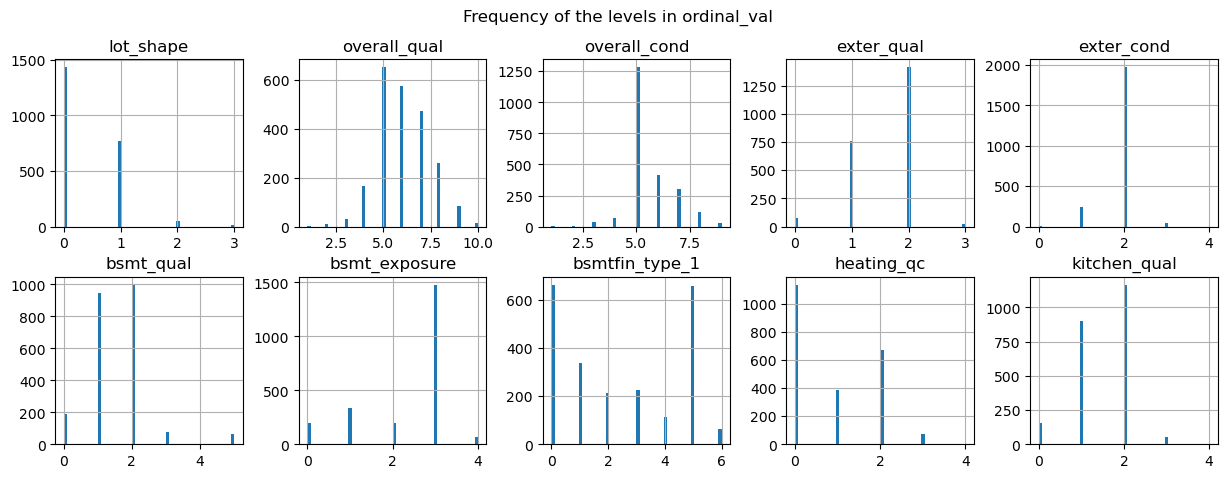

In [88]:
df[ordinal_var].hist(bins=50, figsize=(15,5), layout=(-1, 5))
plt.suptitle("Frequency of the levels in ordinal_val")
plt.show()

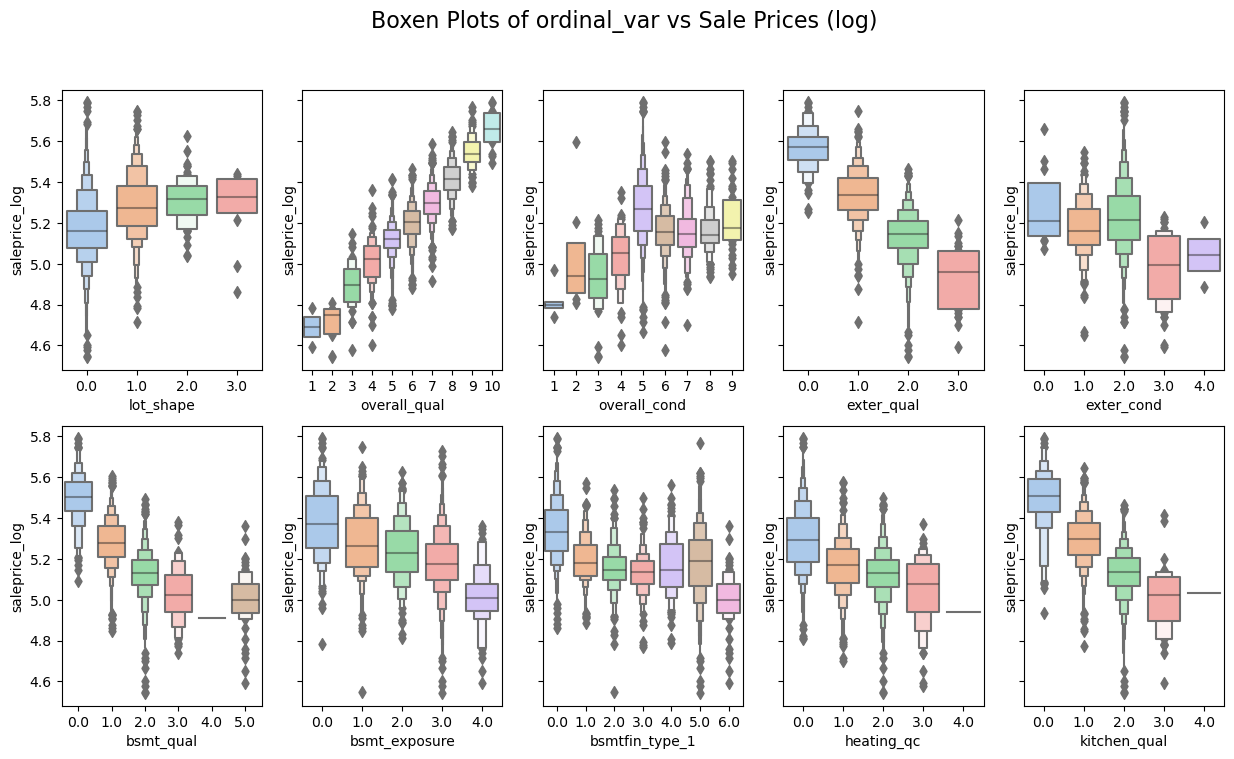

In [89]:
# Define the columns to plot
ordinal_var_list = df[ordinal_var].columns

# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize=(15, 8), sharey=True)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, ordinal_var_list in enumerate(ordinal_var_list):
    sns.boxenplot(data=df, 
                  x=ordinal_var_list, 
                  y=df["saleprice_log"], 
                  ax=axes[i], 
                  palette="pastel")

#fig.tight_layout()
plt.suptitle("Boxen Plots of ordinal_var vs Sale Prices (log)", fontsize=16)
plt.show()

The boxen plot above provides a visual representation of the relationship between 14 ordinal variables and the logarithm of sales prices. From the plot, it is evident that certain variables, such as 'overall_quall', 'exter_qual', and 'kitchen_qual', exhibit strong correlations with sales prices.

#### Nominal variable

In [90]:
# Create a list of nominal variables
nominal_var = ['ms_zoning', 'land_contour', 'lot_config', 'neighborhood', 'bldg_type', 'house_style', 'roof_style', 
               'mas_vnr_type', 'foundation', 'central_air', 'garage_type', 'sale_condition', 'exterior_1st']

In [91]:
df[nominal_var].head()

ms_zoning land_contour lot_config neighborhood bldg_type house_style  \
0        RL          Lvl     Inside      Gilbert      1Fam      2Story   
1        RL          Lvl     Corner        NAmes      1Fam      1Story   
2        RM          Lvl     Inside      MeadowV     Twnhs      2Story   
3        RL          Lvl     Inside        NAmes      1Fam      1Story   
4        RM          Bnk     Inside      OldTown    2fmCon      2.5Unf   

  roof_style mas_vnr_type foundation central_air garage_type sale_condition  \
0      Gable         None      PConc           Y     BuiltIn         Normal   
1        Hip      BrkFace     CBlock           Y      Attchd         Normal   
2      Gable      BrkFace     CBlock           Y      Attchd         Normal   
3        Hip         None     CBlock           Y      Attchd         Normal   
4        Hip         None     CBlock           N      Detchd         Normal   

  exterior_1st  
0      VinylSd  
1      Wd Sdng  
2      CemntBd  
3      BrkFace  
4      Wd Sdng

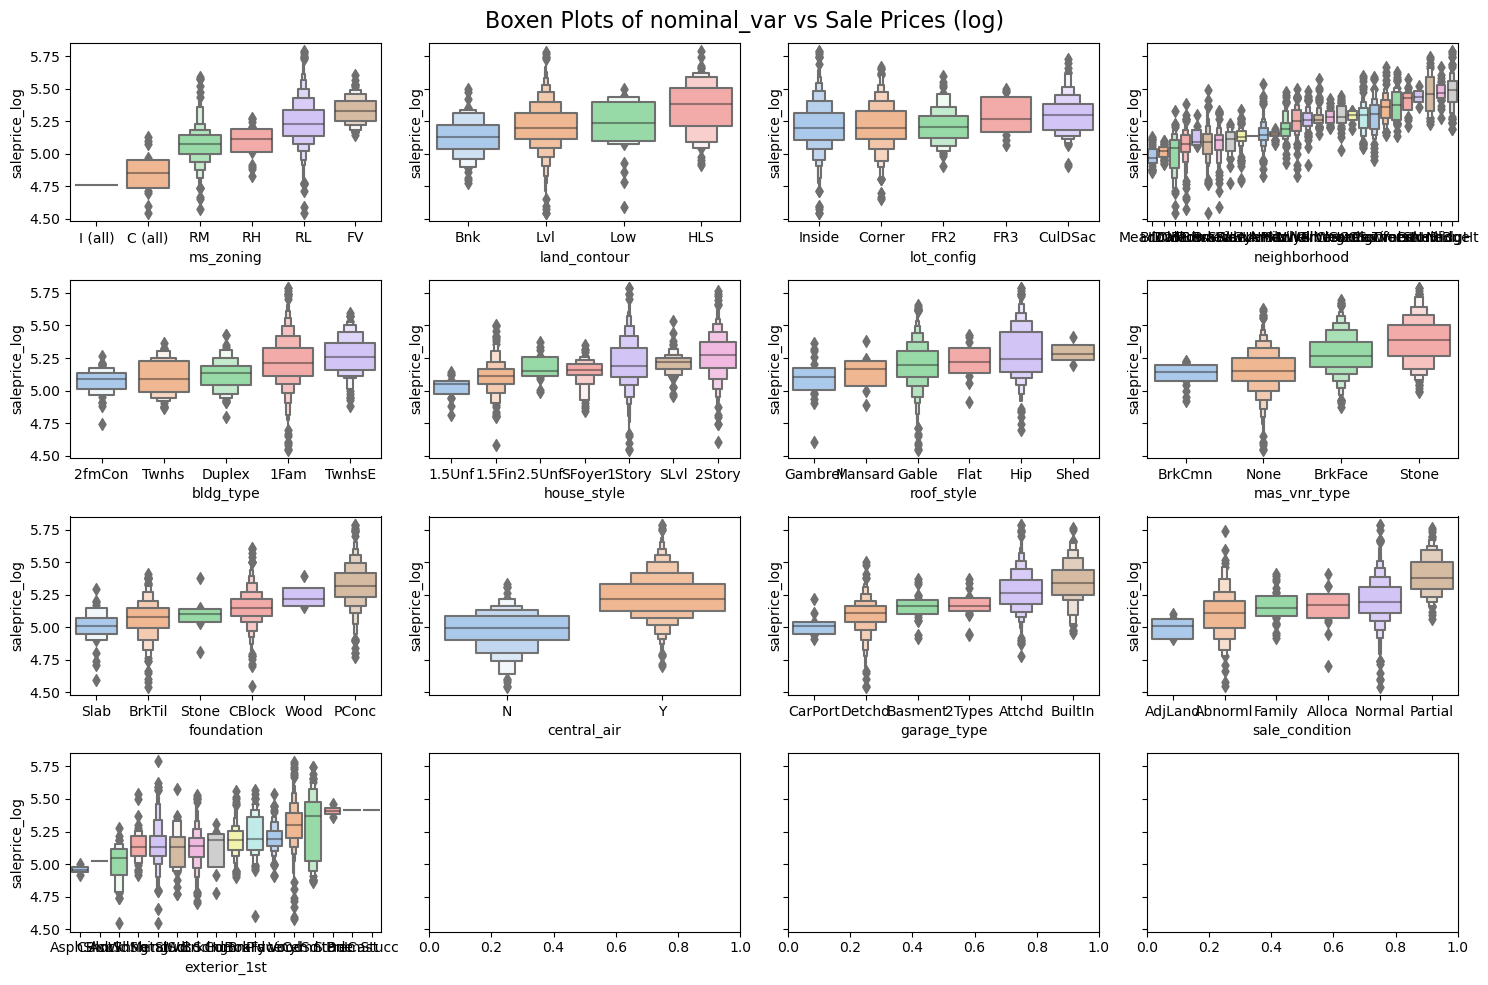

In [92]:
# Define the columns to plot
nominal_var_list = df[nominal_var].columns

# Create the figure and axes objects for the subplots
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize=(15, 10), sharey=True)

# Flatten the axes array to access each subplot individually
axes = axes.flatten()

# Loop through the columns and plot each one in a separate subplot
for i, nominal_var_list in enumerate(nominal_var_list):
    sns.boxenplot(data=df, 
                  x=nominal_var_list, 
                  y=df["saleprice_log"], 
                  ax=axes[i], 
                  palette="pastel",
                  order=df.groupby(nominal_var_list)["saleprice_log"].median().sort_values().index)

plt.suptitle("Boxen Plots of nominal_var vs Sale Prices (log)", fontsize=16)
fig.tight_layout()
plt.show()

The boxen plot above presents a visual depiction of the connection between 13 nominal variables and the logarithm of sales prices.

By examining the plot, it becomes clear that specific variables, namely 'ms_zoning', 'neighborhood', and 'sale_condition', demonstrate significant correlations with sales prices. These variables appear to have a considerable impact on determining the pricing of properties.

In [93]:
# Let's perform one-hot encoding on the nominal variables in the DataFrame
encoded_df = pd.get_dummies(df, columns=nominal_var)
encoded_df.head()

ms_subclass  lot_frontage  lot_area  lot_shape  overall_qual  overall_cond  \
0           60          68.0      8795        1.0             7             5   
1           20          75.0     10170        0.0             6             6   
2          160          21.0      2001        0.0             4             5   
3           20          70.0     10552        1.0             5             5   
4          190          60.0     10120        1.0             7             4   

   year_built  year_remod/add  mas_vnr_area  exter_qual  exter_cond  \
0        2000            2000           0.0         1.0         2.0   
1        1951            1951         522.0         2.0         2.0   
2        1970            1970          80.0         2.0         2.0   
3        1959            1959           0.0         2.0         2.0   
4        1910            1910           0.0         3.0         2.0   

   bsmt_qual  bsmt_exposure  bsmtfin_type_1  bsmt_unf_sf  total_bsmt_sf  \
0        1.0            3.0             0.0        652.0          952.0   
1        2.0            3.0             5.0        216.0          216.0   
2        2.0            3.0             5.0        546.0          546.0   
3        2.0            3.0             3.0        380.0         1398.0   
4        2.0            3.0             5.0        925.0          925.0   

   heating_qc  1st_flr_sf  gr_liv_area  bsmt_full_bath  full_bath  half_bath  \
0         0.0         980         2256             0.0          2          1   
1         2.0        1575         1575             0.0          1          1   
2         3.0         546         1092             0.0          1          1   
3         1.0        1700         1700             0.0          1          1   
4         2.0         964         1889             0.0          1          1   

   bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd  fireplaces  \
0              4              1           1.0              8           1   
1              2              1           1.0              5           1   
2              3              1           2.0              6           0   
3              4              1           1.0              6           1   
4              4              2           2.0              9           1   

   garage_finish  garage_cars  garage_area  garage_qual  wood_deck_sf  \
0              3          2.0        554.0            3           224   
1              1          2.0        400.0            3             0   
2              1          1.0        286.0            3             0   
3              2          2.0        447.0            3             0   
4              1          1.0        308.0            3             0   

   open_porch_sf  mo_sold  yr_sold  saleprice_log  overall_qual_cond  \
0             54        4     2009       5.372912                 35   
1              0        6     2006       5.190332                 36   
2              0        1     2007       4.875061                 20   
3             38        4     2010       5.218798                 25   
4              0        1     2007       5.086360                 28   

   ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  ms_zoning_RH  \
0                  0             0                  0             0   
1                  0             0                  0             0   
2                  0             0                  0             0   
3                  0             0                  0             0   
4                  0             0                  0             0   

   ms_zoning_RL  ms_zoning_RM  land_contour_Bnk  land_contour_HLS  \
0             1             0                 0                 0   
1             1             0                 0                 0   
2             0             1                 0                 0   
3             1             0                 0                 0   
4             0             1                 1         

In [94]:
# Check the number of rows and columns
print("The shape of the dataframe is ",df.shape[0], "rows and " ,df.shape[1], "columns")

The shape of the dataframe is  2271 rows and  50 columns


In [95]:
# Check the number of rows and columns
print("The shape of the encoded dataframe is ",encoded_df.shape[0], "rows and " ,encoded_df.shape[1], "columns")

The shape of the encoded dataframe is  2271 rows and  138 columns


## Splitting data

In [96]:
X = encoded_df.drop('saleprice_log', axis=1)
y = encoded_df.saleprice_log

In [97]:
# Split into train/validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.4, random_state=0)

In [98]:
print("Train DataFrame:", X_tr.shape, y_tr.shape)
print("Test DataFrame:", X_val.shape, y_val.shape)

Train DataFrame: (1362, 137) (1362,)
Test DataFrame: (909, 137) (909,)


## Model fitting

I decide to test the SelectKBest object that I found in Scikit-learn to do automatic feature selection.

In [99]:
# Feature selection using SelectKBest
k = 30  # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_tr, y_tr)

In [100]:
# Get the scores from SelectKBest
scores = selector.scores_

# Create a DataFrame with column names and scores
columns_scores = pd.DataFrame({'Feature': X_tr.columns, 'K_score': scores})

# Sort the DataFrame by scores in descending order
columns_scores = columns_scores.sort_values(by='K_score', ascending=False).head(k)
columns_scores.head()

Feature      K_score
4   overall_qual  3053.444326
18   gr_liv_area  1580.705516
9     exter_qual  1273.737834
28   garage_cars  1159.304696
29   garage_area  1120.829160

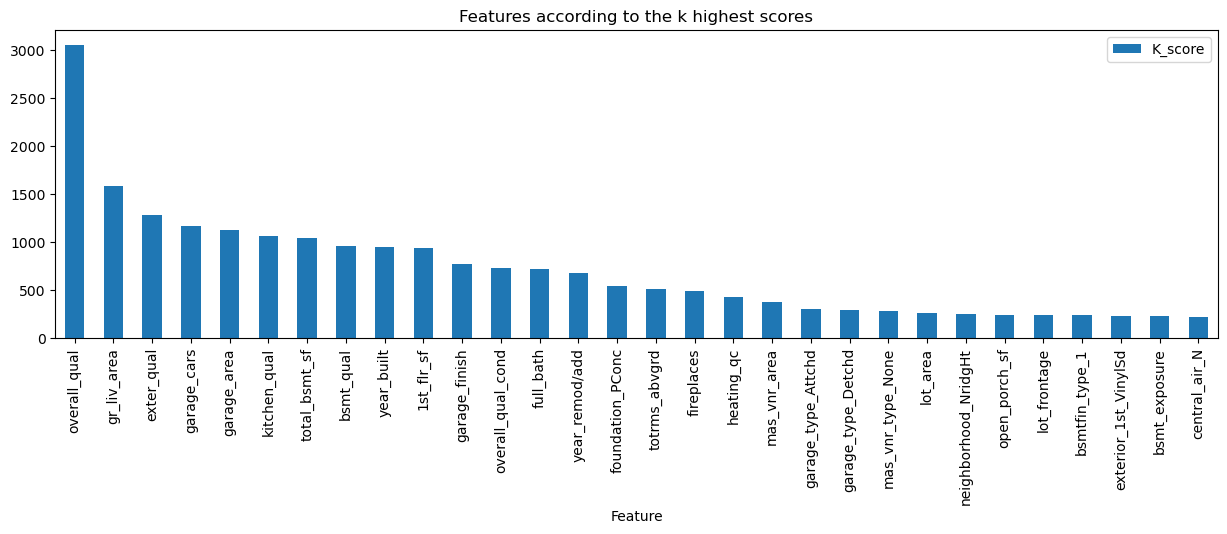

In [101]:
columns_scores.plot.bar(x='Feature', figsize=(15, 4), title="Features according to the k highest scores")
plt.show()

the plot bar above highlight the K score of each features. we can noticed that "overall_qual" is the most strong parameter

Compute the correlation between 'saleprice_log' and all the other column and compare with SelectKBest

In [102]:
# Compute the correlation with 'slesprice_log' column
correlation = df.corr()['saleprice_log'].to_frame()

# Change the index column and rename it
correlation = correlation.rename_axis('Feature').reset_index()

# Rename the 'saleprice_log' column as 'corr_score'
correlation = correlation.rename(columns={'saleprice_log': 'corr_score'})

In [103]:
# Merge the dataframes
correlation_df = pd.merge(correlation, columns_scores, on='Feature')
correlation_df = correlation_df.sort_values(by='K_score', ascending=False)
correlation_df['corr_score_abs'] = abs(correlation_df['corr_score'])
correlation_df.head()

Feature  corr_score      K_score  corr_score_abs
2   overall_qual    0.833168  3053.444326        0.833168
13   gr_liv_area    0.715904  1580.705516        0.715904
6     exter_qual   -0.693345  1273.737834        0.693345
19   garage_cars    0.689017  1159.304696        0.689017
20   garage_area    0.669597  1120.829160        0.669597

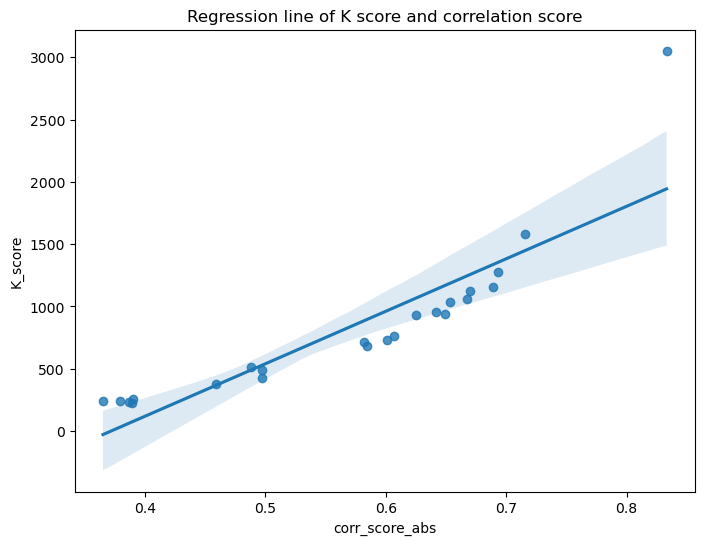

In [104]:
plt.figure(figsize=(8, 6))
sns.regplot(x=correlation_df['corr_score_abs'], y=correlation_df['K_score'])
plt.title('Regression line of K score and correlation score')
plt.xlabel('corr_score_abs')
plt.ylabel('K_score')
plt.show()

The regression line above show us a direct correlation between SelectKBest and corr.

After analyzing the bar chart above, I have made the decision to select the two highest-scoring features, namely 'overall_qual' and 'gr_liv_area', for creating my simple model.

Regarding the intermediate model, I have chosen to include only the features that have a k score above 300. This selection results in a set of 13 features that will be used in the intermediate model.

In [105]:
simple = ['overall_qual', 'gr_liv_area']
X_tr_spl = X_tr[simple]
X_val_spl =X_val[simple]

In [106]:
# Filter the DataFrame based on the score
intermediate = columns_scores.loc[columns_scores['K_score'] > 300, 'Feature'].tolist()
X_tr_interm = X_tr[intermediate]
X_val_interm =X_val[intermediate]

## Evaluation metrics

In [107]:
# Compare models with mean absolute error cost function:
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

### Baseline

In [108]:
# Create baseline
mae_baseline = MAE(10 ** y_val, np.median(10 ** y_tr))
print("MAE baseline: {:.1f}".format(mae_baseline))

MAE baseline: 53301.9


### Simple model

In [109]:
# Linear regression
lr_spl = LinearRegression()

# Fit to train data
lr_spl.fit(X_tr_spl, y_tr)

# Predictions for test data 
y_pred_lr_spl = lr_spl.predict(X_val_spl)

# Compute MAE
mae_lr_spl = MAE(10 ** y_val, 10 ** y_pred_lr_spl)
print("MAE linear regression (simple): {:.1f}".format(mae_lr_spl))

# R^2 coefficient
R2_spl =lr_spl.fit(X_tr_spl, y_tr).score(X_tr_spl, y_tr)
print("R^2 coefficient: {:.3f}".format(R2_spl))

MAE linear regression (simple): 23935.7
R^2 coefficient: 0.784


### Intermediate model

In [110]:
# Linear regression
lr_interm = LinearRegression()

# Fit to train data
lr_interm.fit(X_tr_interm, y_tr)

# Predictions for test data 
y_pred_lr_interm = lr_interm.predict(X_val_interm)

# Compute MAE
mae_lr_interm = MAE(10 ** y_val, 10 ** y_pred_lr_interm)
print("MAE linear regression (intermediate): {:.1f}".format(mae_lr_interm))

# R^2 coefficient
R2_interm = lr_interm.fit(X_tr_interm, y_tr).score(X_tr_interm, y_tr)
print("R^2 coefficient: {:.3f}".format(R2_interm))

MAE linear regression (intermediate): 16190.3
R^2 coefficient: 0.897


### Complex model

In [111]:
# Linear regression
lr_cplx = LinearRegression()

# Fit to train data
lr_cplx.fit(X_tr, y_tr)

# Predictions for test data 
y_pred_lr_cplx = lr_cplx.predict(X_val)

# Compute MAE
mae_lr_cplx = MAE(10 ** y_val, 10 ** y_pred_lr_cplx)
print("MAE linear regression (complex): {:.1f}".format(mae_lr_cplx))

# R^2 coefficient
R2_cplx = lr_cplx.fit(X_tr, y_tr).score(X_tr, y_tr)
print("R^2 coefficient: {:.3f}".format(R2_cplx))

MAE linear regression (complex): 13607.8
R^2 coefficient: 0.941


## Regularization

In [112]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_val_rescaled = scaler.transform(X_val)

In [113]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

# Variable to store the results
gs_results = []

# Grid search
for alpha in np.logspace(-4, 8, num=50):
    # Create and fit ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_rescaled, y_tr)

    # Save model and its performance on train/validation sets
    gs_results.append(
        {
            "alpha": alpha,
            "train_mse": MSE(y_tr, ridge.predict(X_tr_rescaled)),
            "train_mae": MAE(10 ** y_tr, 10 ** ridge.predict(X_tr_rescaled)),
            "validation_mse": MSE(y_val, ridge.predict(X_val_rescaled)),
            "validation_mae": MAE(10 ** y_val, 10 ** ridge.predict(X_val_rescaled)),
        }
    )

In [114]:
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

alpha  train_mse     train_mae  validation_mse  validation_mae
0  0.000100   0.001656  11265.938664        0.002542    13589.220860
1  0.000176   0.001656  11265.938417        0.002542    13589.221883
2  0.000309   0.001656  11265.937983        0.002542    13589.223683
3  0.000543   0.001656  11265.937221        0.002542    13589.226845
4  0.000954   0.001656  11265.935892        0.002542    13589.232402

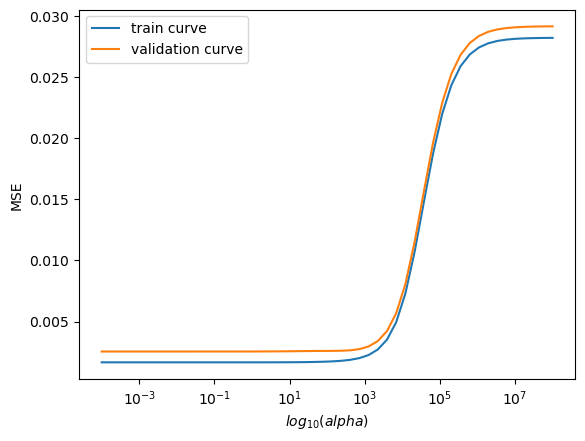

In [115]:
# Plot the validation curves
plt.semilogx(gs_results["alpha"], gs_results["train_mse"], label="train curve")
plt.semilogx(
    gs_results["alpha"], gs_results["validation_mse"], label="validation curve"
)
plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

There are a few things to observe about this result.

- The optimal range of alpha values seems to be under 10e3, where we get the best validation score, i.e. the smallest generalization error.
- The validation score remains relatively stable when the alpha value ranges from 0 to 10^3.
- The models starts underfitting when alpha is larger than 10e4 as training and validation scores agree but the model performs worse than for other alpha values.

In [116]:
# Get entry with the best validation MSE
best_result = gs_results.loc[gs_results.validation_mse.idxmin()]

# Print the details
print("Best alpha: {:.1e}".format(best_result.alpha))
print("Validation MSE: {:.4f}".format(best_result.validation_mse))
print("Validation MAE: {:,.0f}$".format(best_result.validation_mae))

Best alpha: 1.0e-04
Validation MSE: 0.0025
Validation MAE: 13,589$


The best alpha value is 1.0e-04 with a mean validation MSE of 0.0025 and a mean validation MAE of 13,589 dollars which is not far from the values computed above

### cross-validation

In [117]:
# Fit/validate N models
gs_results = []
for run_idx in range(10):

    # Split into train/validation sets
    X_tr, X_val, y_tr, y_val = train_test_split(
        X, y, test_size=0.4, random_state=run_idx
    )

    # Standardize features
    X_tr_rescaled = scaler.fit_transform(X_tr)
    X_val_rescaled = scaler.transform(X_val)

    # Grid search
    for alpha in np.logspace(0, 4, num=20):
        # Create and fit ridge regression
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_tr_rescaled, y_tr)

        # Save model and its performance on train/validation sets
        gs_results.append(
            {
                "model": ridge,
                "alpha": alpha,
                "run_idx": run_idx,
                "train_mse": MSE(y_tr, ridge.predict(X_tr_rescaled)),
                "train_mae": MAE(10 ** y_tr, 10 ** ridge.predict(X_tr_rescaled)),
                "validation_mse": MSE(y_val, ridge.predict(X_val_rescaled)),
                "validation_mae": MAE(10 ** y_val, 10 ** ridge.predict(X_val_rescaled)),
            }
        )

In [118]:
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.head()

model     alpha  run_idx  train_mse  \
0                          Ridge()  1.000000        0   0.001657   
1  Ridge(alpha=1.6237767391887217)  1.623777        0   0.001657   
2   Ridge(alpha=2.636650898730358)  2.636651        0   0.001657   
3   Ridge(alpha=4.281332398719393)  4.281332        0   0.001658   
4   Ridge(alpha=6.951927961775605)  6.951928        0   0.001660   

      train_mae  validation_mse  validation_mae  
0  11263.161767        0.002545    13602.226400  
1  11262.130810        0.002546    13609.735231  
2  11261.185809        0.002549    13620.499782  
3  11261.639653        0.002552    13636.099943  
4  11264.891669        0.002558    13656.566768

Let’s group the results by alpha value and compute the average scores.

In [119]:
# Group results by alpha value
gb_alpha = gs_results.groupby("alpha")

# Compute train/validation mean scores with std
mean_tr = gb_alpha.train_mse.mean()
mean_val = gb_alpha.validation_mse.mean()
std_tr = gb_alpha.train_mse.std()
std_val = gb_alpha.validation_mse.std()
alphas = mean_tr.index.values

# Get entry with the best mean validation MSE
best_alpha = mean_val.idxmin()
best_result = gb_alpha.get_group(best_alpha)

# Print the details
print("Best alpha: {:.1e}".format(best_alpha))
print("Validation MSE: {:.4f}".format(best_result.validation_mse.mean()))
print("Validation MAE: {:,.0f}$".format(best_result.validation_mae.mean()))

Best alpha: 7.0e+00
Validation MSE: 0.0023
Validation MAE: 13,113$


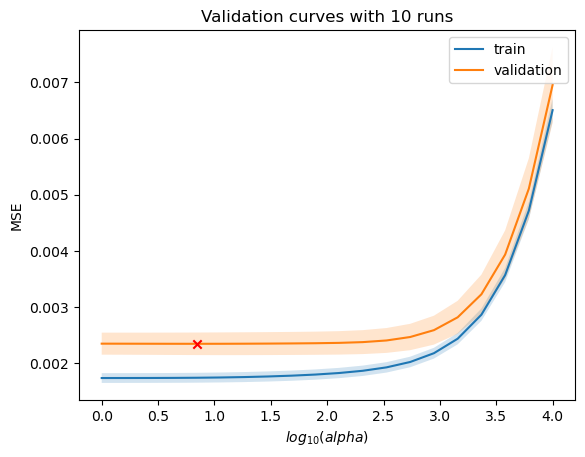

In [120]:
# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label="train")
plt.plot(np.log10(alphas), mean_val, label="validation")

# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr - std_tr, mean_tr + std_tr, alpha=0.2)
plt.fill_between(np.log10(alphas), mean_val - std_val, mean_val + std_val, alpha=0.2)

# Add marker for best score
plt.scatter(np.log10(best_alpha), mean_val.min(), marker="x", c="red", zorder=10)

plt.title("Validation curves with {} runs".format(len(gs_results.groupby("run_idx"))))
plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

## Communicating the results

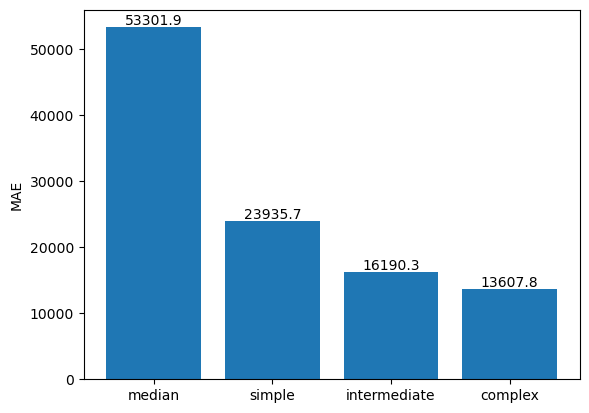

In [121]:
# Comparaison
mae_values = [mae_baseline, mae_lr_spl, mae_lr_interm, mae_lr_cplx]
titles = ["median", "simple", "intermediate", "complex"]

# Plot the bar chart
plt.bar(titles, mae_values)

# Add value labels to each bar
for i, value in enumerate(mae_values):
    plt.text(i, value, "{:.1f}".format(value), ha='center', va='bottom')

plt.ylabel("MAE")
plt.show()

- Fortunately, all three models seem to outperform the baseline. 
- The simple model, with a score of around 24k dollars, performs more than twice as well as the baseline. 
- Among the three models, the complex model achieves the highest score of 13k dollars, making it the best performer.

## Predicting on test data

In [122]:
# Load the data
df_prediction = pd.read_csv("house-prices-test.csv")

# To all column names, replace whitespace with underscores and convert to lowercase
df_prediction.columns = [col.replace(' ', '_').lower() for col in df_prediction.columns]

# Creat a new column which use both quality and condition:
df_prediction['overall_qual_cond'] = df_prediction['overall_qual'] * df_prediction['overall_cond']

scale_mapper = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'nan':0}
# Replace np.nan values by "nan" in order to have only strings
df_prediction['garage_qual'] = df_prediction.garage_qual.fillna("nan")
df_prediction["garage_qual"] = df_prediction.garage_qual.replace(scale_mapper)

scale_mapper = {'Fin':3, 'RFn':2, 'Unf':1, 'nan':0}
# Replace np.nan values by "nan" in order to have only strings
df_prediction['garage_finish'] = df_prediction.garage_finish.fillna("nan")
df_prediction["garage_finish"] = df_prediction.garage_finish.replace(scale_mapper)

columns_name = ['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'lot_shape','land_contour', 'lot_config', 'neighborhood', 'bldg_type', 'house_style', 'overall_qual', 'overall_cond', 
                'year_built', 'year_remod/add', 'roof_style', 'exterior_1st', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_exposure', 'bsmtfin_type_1',
                'bsmt_unf_sf', 'total_bsmt_sf', 'heating_qc', 'central_air', '1st_flr_sf', 'gr_liv_area', 'bsmt_full_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual', 
                'totrms_abvgrd', 'fireplaces', 'garage_type', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'wood_deck_sf', 'open_porch_sf', 'mo_sold', 'yr_sold', 'sale_condition', 'overall_qual_cond']


df_prediction = df_prediction.loc[:, columns_name]

In [123]:
# Replace np.nan values by "nan" in order to have only strings
df_prediction[ordinal_var_str] = df_prediction[ordinal_var_str].fillna("nan")
df_prediction[ordinal_var_str] = df_prediction[ordinal_var_str].replace(0, "nan")

In [124]:
df_prediction[ordinal_var_str] = oe.fit_transform(df_prediction[ordinal_var_str])

In [125]:
# encoded nominal var 
encoded_df_prediction = pd.get_dummies(df_prediction, columns=nominal_var)

In [126]:
encoded_df_cols = encoded_df.columns
encoded_df_pred_cols = encoded_df_prediction.columns

# Find elements in list1 that are not in list2
elements_not_in_df_pred = list(set(encoded_df_cols) - set(encoded_df_pred_cols))
print(elements_not_in_df_pred) 

['ms_zoning_I (all)', 'neighborhood_Landmrk', 'exterior_1st_Stone', 'roof_style_Shed', 'exterior_1st_ImStucc', 'exterior_1st_PreCast', 'neighborhood_Greens', 'foundation_Wood', 'saleprice_log', 'exterior_1st_AsphShn', 'exterior_1st_BrkComm', 'neighborhood_GrnHill', 'exterior_1st_CBlock']


In [127]:
# Remove element 3 from the list
elements_not_in_df_pred.remove('saleprice_log')

# Add columns to the DataFrame and fill them with 0
for element in elements_not_in_df_pred:
    encoded_df_prediction[element] = float(0)

In [128]:
encoded_df_prediction.drop('house_style_2.5Fin', axis=1, inplace=True)

In [129]:
# Check size of encoded_df_prediction and encoded_df
print(encoded_df_prediction.shape[1])
print(encoded_df.shape[1])

137
138


In [130]:
encoded_df_prediction = encoded_df_prediction.fillna(0)

In [131]:
# Predictions with simple model
encoded_df_prediction['y_pred_lr_spl'] = 10**lr_spl.predict(encoded_df_prediction[simple])

In [132]:
# Predictions with intermediate model
encoded_df_prediction['y_pred_lr_interm'] = 10**lr_interm.predict(encoded_df_prediction[intermediate])

In [133]:
cols_cplx = X_tr.columns
encoded_df_prediction_rescaled = scaler.transform(encoded_df_prediction[cols_cplx])

In [134]:
# Predictions with complex model
encoded_df_prediction['y_pred_lr_cplx'] = 10**ridge.predict(encoded_df_prediction_rescaled)

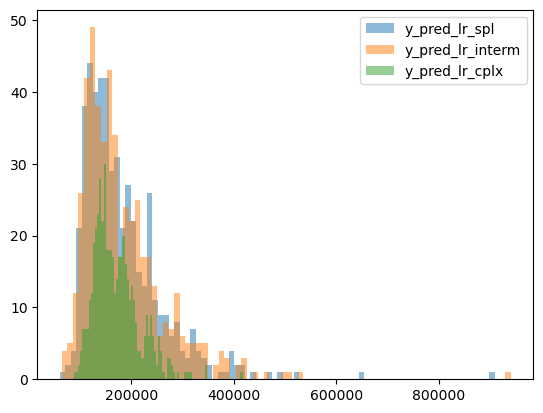

In [135]:
predictions = ['y_pred_lr_spl', 'y_pred_lr_interm', 'y_pred_lr_cplx']

for col in predictions:
    plt.hist(encoded_df_prediction[col], alpha=0.5, bins=80)
plt.legend(predictions)
plt.show()

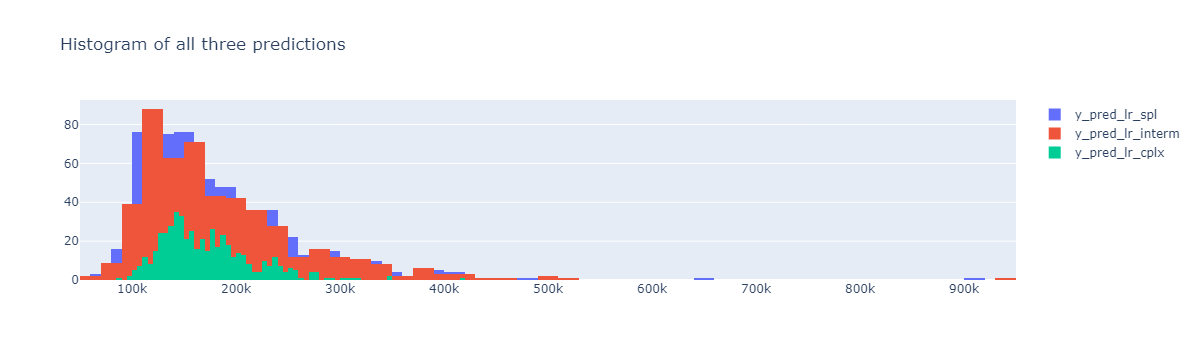

In [136]:
# Same as previous chart but with the plotly library

import plotly.graph_objects as go

predictions = ['y_pred_lr_spl', 'y_pred_lr_interm', 'y_pred_lr_cplx']

data = []
for col in predictions:
    data.append(go.Histogram(x=encoded_df_prediction[col], nbinsx=80, name=col))

layout = go.Layout(title='Histogram of all three predictions', barmode='overlay')
fig = go.Figure(data=data, layout=layout)
fig.show()

In [137]:
# prediction file for simple model : predictions-simple-model.csv
predictions_simple_model = pd.read_csv("house-prices-test.csv")
predictions_simple_model['SalePrice'] = 10**lr_spl.predict(encoded_df_prediction[simple])
predictions_simple_model = predictions_simple_model[['PID', 'SalePrice']]
predictions_simple_model.to_csv('predictions-simple-model.csv', index=False)

In [138]:
# prediction file for intermediate model : predictions-intermediate-model.csv
predictions_interm_model = pd.read_csv("house-prices-test.csv")
predictions_interm_model['SalePrice'] = 10**lr_interm.predict(encoded_df_prediction[intermediate])
predictions_interm_model = predictions_interm_model[['PID', 'SalePrice']]
predictions_interm_model.to_csv('predictions-intermediate-model.csv', index=False)

In [139]:
# prediction file for complex model : predictions-complex-model.csv
predictions_cplx_model = pd.read_csv("house-prices-test.csv")
predictions_cplx_model['SalePrice'] = 10**lr_cplx.predict(encoded_df_prediction[cols_cplx])
predictions_cplx_model = predictions_cplx_model[['PID', 'SalePrice']]
predictions_cplx_model.to_csv('predictions-complex-model.csv', index=False)

## Evaluate your predictions

Upon reviewing the results of the three predictions, it is evident that the complex model outperforms the intermediate and simple models in terms of MAEs. This observation is consistent and expected. Additionally, the RMSEs are slightly higher than the MAEs, which can be attributed to the fact that RMSE is more sensitive to outliers in the data.